In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from random import seed
plt.style.use("seaborn")

from warnings import filterwarnings

filterwarnings("ignore")

seed(0)

/tmp/ipykernel_4081/3061425549.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [5]:
chatelet_air=pd.read_csv("qualite-de-lair-mesuree-dans-la-station-chatelet.csv",sep=";")
auber_air=pd.read_csv("qualite-de-lair-mesuree-dans-la-station-auber.csv",sep=";")
roosevelt_air=pd.read_csv("qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv",sep=";")
mergedData=pd.read_csv("mergedData.csv")

In [6]:
chatelet_air.head()

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,ND,ND,43,508,"18,2","49,1"
1,2022-10-10T01:00:00+02:00,ND,ND,45,529,"18,5","48,4"
2,2022-10-10T00:00:00+02:00,ND,ND,42,547,"18,8","47,1"
3,2022-10-09T23:00:00+02:00,ND,ND,59,614,"19,1","47,2"
4,2022-10-09T22:00:00+02:00,ND,ND,65,637,"19,4","46,3"


In [7]:
auber_air.head()

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,28,56,103,35,509,"21,7","43,7"
1,2022-10-10T01:00:00+02:00,29,58,108,41,518,"21,8","43,1"
2,2022-10-10T00:00:00+02:00,28,58,140,52,533,22,"42,9"
3,2022-10-09T23:00:00+02:00,27,57,113,41,570,"22,1","43,1"
4,2022-10-09T22:00:00+02:00,15,53,138,49,588,"22,4","42,2"


In [8]:
roosevelt_air.head()

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,33,58,58,522,"21,3",44
1,2022-10-10T01:00:00+02:00,53,63,48,540,"21,5","43,3"
2,2022-10-10T00:00:00+02:00,31,62,39,551,"21,6","42,6"
3,2022-10-09T23:00:00+02:00,21,63,31,542,21,"44,7"
4,2022-10-09T22:00:00+02:00,10,48,30,532,"20,8","45,2"


In [9]:
mergedData.head()

,DATE/HEURE,NO_aub,NO2_aub,PM10_aub,PM2.5,CO2_aub,TEMP_aub,HUMI_aub,NO_chat,NO2_chat,PM10_chat,CO2_chat,TEMP_chat,HUMI_chat,NO_roo,NO2_roo,PM10_roo,CO2_roo,TEMP_roo,HUMI_roo
0,2022-10-10T02:00:00+02:00,28,56,103,35,509,"21,7","43,7",ND,ND,43,508,"18,2","49,1",33,58,58,522,"21,3",44
1,2022-10-10T01:00:00+02:00,29,58,108,41,518,"21,8","43,1",ND,ND,45,529,"18,5","48,4",53,63,48,540,"21,5","43,3"
2,2022-10-10T00:00:00+02:00,28,58,140,52,533,22,"42,9",ND,ND,42,547,"18,8","47,1",31,62,39,551,"21,6","42,6"
3,2022-10-09T23:00:00+02:00,27,57,113,41,570,"22,1","43,1",ND,ND,59,614,"19,1","47,2",21,63,31,542,21,"44,7"
4,2022-10-09T22:00:00+02:00,15,53,138,49,588,"22,4","42,2",ND,ND,65,637,"19,4","46,3",10,48,30,532,"20,8","45,2"


In [10]:
chatelet_air["DATE/HEURE"]=pd.to_datetime(chatelet_air["DATE/HEURE"],errors="coerce",utc=True)
auber_air["DATE/HEURE"]=pd.to_datetime(auber_air["DATE/HEURE"],errors="coerce",utc=True)
roosevelt_air["DATE/HEURE"]=pd.to_datetime(roosevelt_air["date/heure"],errors="coerce",utc=True)
roosevelt_air=roosevelt_air.drop(columns=["date/heure"])
mergedData["DATE/HEURE"]=pd.to_datetime(mergedData["DATE/HEURE"],errors="coerce",utc=True)

In [11]:
chatelet_air=chatelet_air.dropna()
auber_air=auber_air.dropna()
roosevelt_air=roosevelt_air.dropna()
mergedData=mergedData.dropna()

In [12]:
roosevelt_air.shape,chatelet_air.shape,auber_air.shape,mergedData.shape

((75991, 7), (60733, 7), (75808, 8), (54014, 20))

In [13]:
# Feature engineering for date

chatelet_air["Heure"]=chatelet_air["DATE/HEURE"].dt.hour
chatelet_air["Day"]=chatelet_air["DATE/HEURE"].dt.day
chatelet_air["Month"]=chatelet_air["DATE/HEURE"].dt.month
chatelet_air["Year"]=chatelet_air["DATE/HEURE"].dt.year

auber_air["Heure"]=auber_air["DATE/HEURE"].dt.hour
auber_air["Day"]=auber_air["DATE/HEURE"].dt.day
auber_air["Month"]=auber_air["DATE/HEURE"].dt.month
auber_air["Year"]=auber_air["DATE/HEURE"].dt.year

roosevelt_air["Heure"]=roosevelt_air["DATE/HEURE"].dt.hour
roosevelt_air["Day"]=roosevelt_air["DATE/HEURE"].dt.day
roosevelt_air["Month"]=roosevelt_air["DATE/HEURE"].dt.month
roosevelt_air["Year"]=roosevelt_air["DATE/HEURE"].dt.year

mergedData["Heure"]=mergedData["DATE/HEURE"].dt.hour
mergedData["Day"]=mergedData["DATE/HEURE"].dt.day
mergedData["Month"]=mergedData["DATE/HEURE"].dt.month
mergedData["Year"]=mergedData["DATE/HEURE"].dt.year

In [14]:
# Deleting datetime columns not useful for prediction

roosevelt_air=roosevelt_air.drop(columns=["DATE/HEURE"])
chatelet_air=chatelet_air.drop(columns=["DATE/HEURE"])
auber_air=auber_air.drop(columns=["DATE/HEURE"])
mergedData=mergedData.drop(columns=["DATE/HEURE"])

In [15]:
roosevelt_air.head(2)

,NO,NO2,PM10,CO2,TEMP,HUMI,Heure,Day,Month,Year
0,33,58,58,522,"21,3",44,0,10,10,2022
1,53,63,48,540,"21,5","43,3",23,9,10,2022


In [16]:
# Formating of numbers by replacing , by . for converting object to float

def convert_object_to_float(df):

    """
    df: a dataframe

    convert object columns to float after formating

    return the dataframe to the right format
    
    """

    object_columns=df.select_dtypes(include="object").columns

    df[object_columns]=df[object_columns].astype(str)

    for col in object_columns:

        df[col]=pd.to_numeric(df[col].apply(lambda x: x.replace(",",".").strip()),errors='coerce')

    return df

In [17]:
# Converting object columns to the right type float

roosevelt_air=convert_object_to_float(roosevelt_air)

chatelet_air=convert_object_to_float(chatelet_air)

auber_air=convert_object_to_float(auber_air)

mergedData=convert_object_to_float(mergedData)

In [18]:
roosevelt_air=convert_object_to_float(roosevelt_air)
roosevelt_air.head()

,NO,NO2,PM10,CO2,TEMP,HUMI,Heure,Day,Month,Year
0,33.0,58.0,58.0,522.0,21.3,44.0,0,10,10,2022
1,53.0,63.0,48.0,540.0,21.5,43.3,23,9,10,2022
2,31.0,62.0,39.0,551.0,21.6,42.6,22,9,10,2022
3,21.0,63.0,31.0,542.0,21.0,44.7,21,9,10,2022
4,10.0,48.0,30.0,532.0,20.8,45.2,20,9,10,2022


In [19]:
auber_air.isna().sum()

NO       31446
NO2      28748
PM10     26469
PM2.5    28174
CO2      28902
TEMP     27462
HUMI     27451
Heure        0
Day          0
Month        0
Year         0
dtype: int64

In [20]:
chatelet_air=chatelet_air.dropna()
auber_air=auber_air.dropna()
roosevelt_air=roosevelt_air.dropna()
mergedData=mergedData.dropna()

In [21]:
roosevelt_air.shape,chatelet_air.shape,auber_air.shape,mergedData.shape

((67346, 10), (49771, 10), (37605, 11), (20205, 23))

### Correlation analysis

In [22]:
# correlation computing

cor_auber=auber_air.corr()
cor_chatelet=chatelet_air.corr()
cor_roosevelt=roosevelt_air.corr()

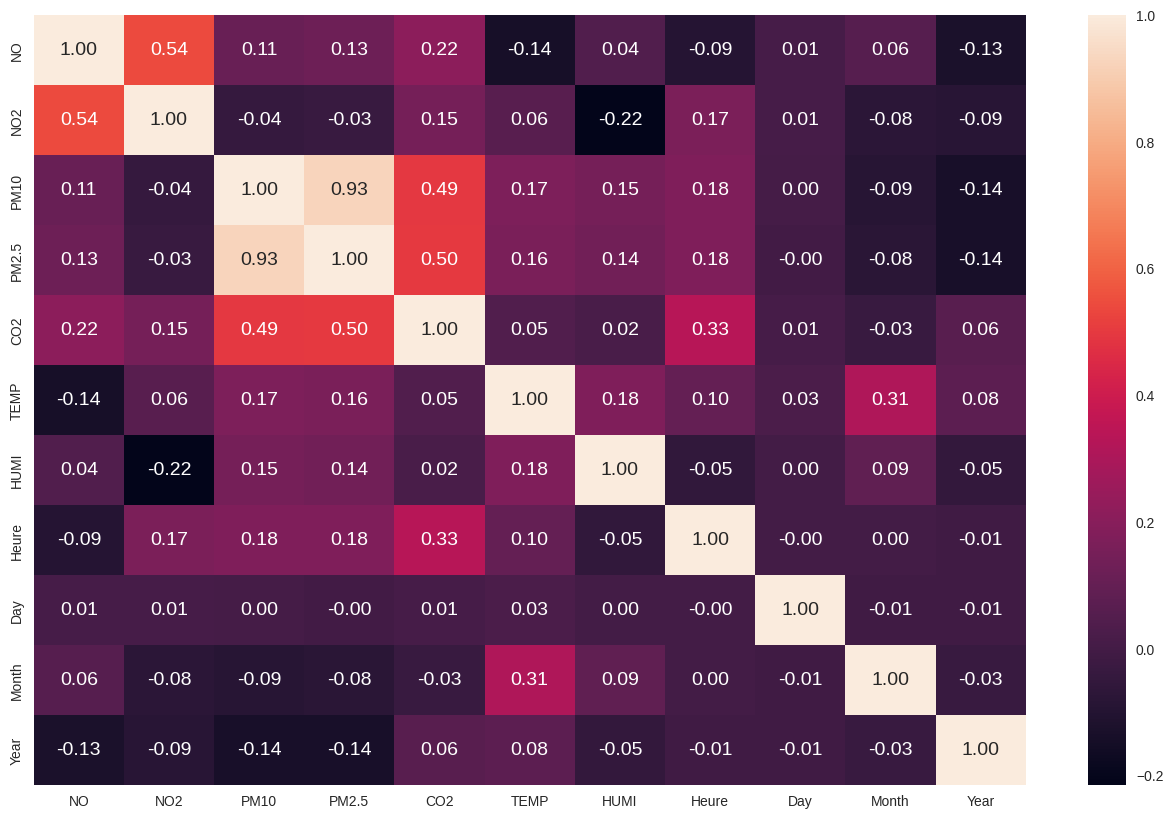

In [23]:
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(16,10))
sns.heatmap(cor_auber,annot=True,fmt='.2f')
#plt.tight_layout()
plt.show()

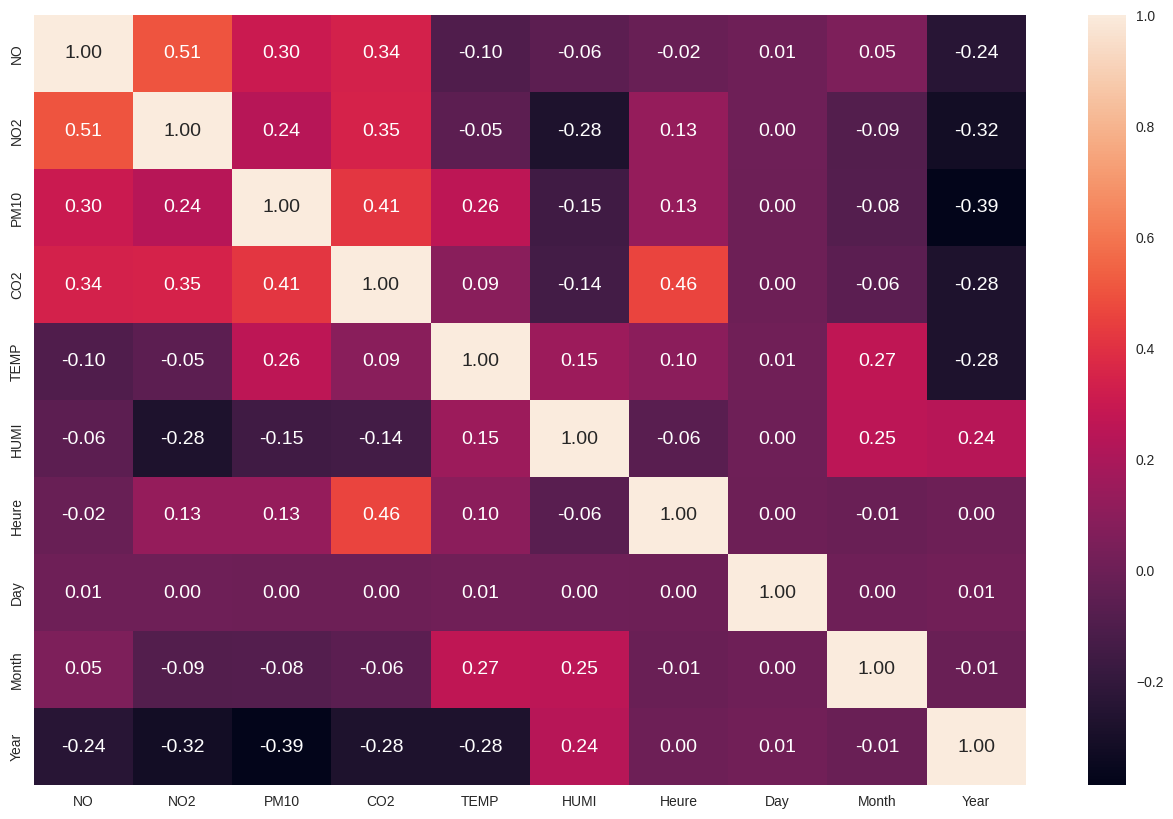

In [24]:
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(16,10))
sns.heatmap(cor_chatelet,annot=True,fmt='.2f')
#plt.tight_layout()
plt.show()

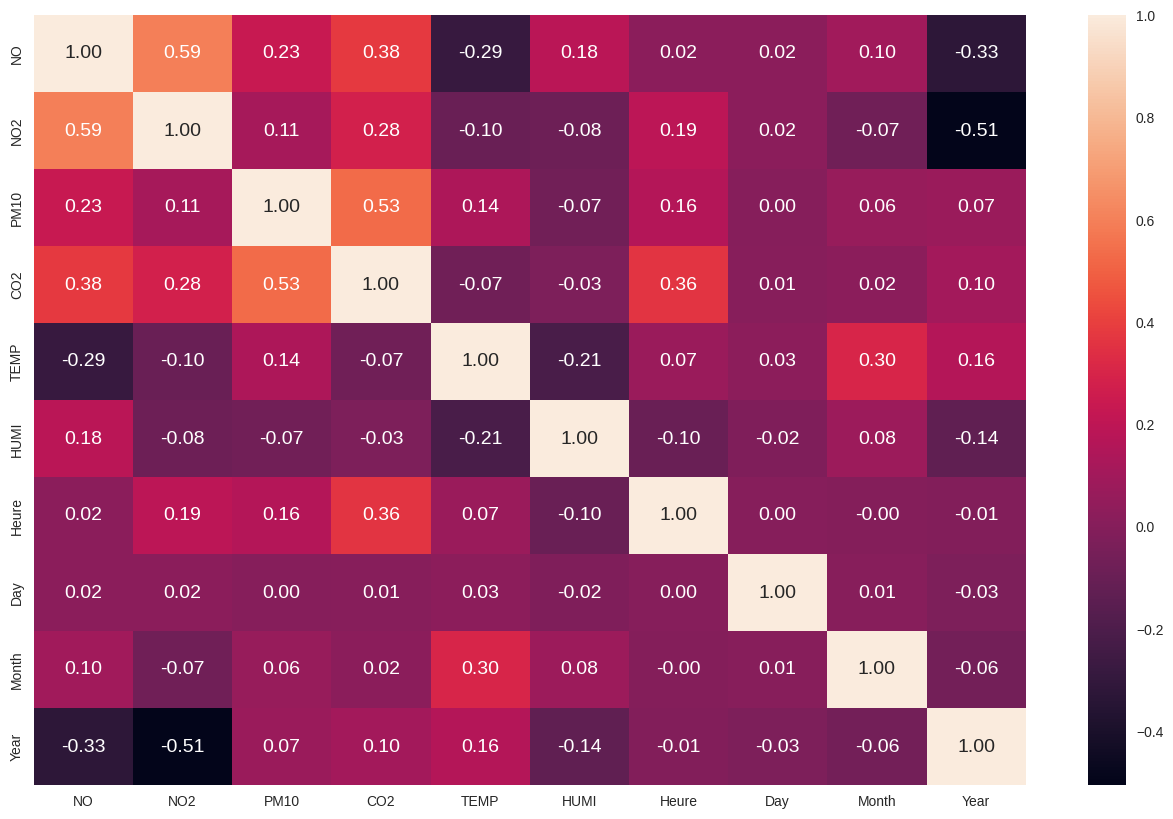

In [25]:
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(16,10))
sns.heatmap(cor_roosevelt,annot=True,fmt='.2f')
#plt.tight_layout()
plt.show()

### Checking for skewness and to resolve it

In [26]:
import numpy as np

def get_best_lmbda(df,col,number_of_lmbda):
    
    """
    This function take take as inputs:
    df: dataframe
    col: a col to transform
    number_of_lmbda: a value for box_cox function to transform col
    
    return:
            return the best lmbda value to get the low skewness of col. And allow 
            to get a new col that follow Gaussian ditribution
    """

    lmbda_values=[]

    skeweness_values=[]

    for lmbda in np.linspace(-1,1,number_of_lmbda):
        
        col_trans=stats.boxcox(df[col],lmbda=lmbda)

        skeweness_values.append(np.abs(stats.skew(col_trans)))

        lmbda_values.append(lmbda)

    plt.plot(lmbda_values,skeweness_values)
    
    plt.ylabel("skewness")
    
    plt.xlabel("lmbda_values")
    
    plt.show()
    
    lmbda_optimal=lmbda_values[skeweness_values.index(min(skeweness_values))]

    print(f"Optimal value of lmbda est:{lmbda_optimal}")

    return lmbda_optimal


def solve_skewness(df,col,lmbda=0.0):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

    df[col+'_trans']=stats.boxcox(df[col],lmbda=lmbda)

    ax[0].hist(df[col])
    ax[1].hist(df[col+'_trans'])

    ax[0].set_title("Orginal data")
    ax[1].set_title("Transformed data")
    ax[0].set_xlabel(col)
    ax[1].set_xlabel(col+'_trans')

    plt.show()

    return df

In [27]:
to_transforms=['NO', 'NO2', 'PM10', 'TEMP', 'HUMI','CO2']

We will add one to all hours to avoid infinity when performing log transformed to solve skewness

In [28]:
def transform_data(df,to_transform_cols):

    for col in to_transform_cols:

        lmbda_optimal=get_best_lmbda(df,col,1000)
        df=solve_skewness(df,col,lmbda=lmbda_optimal)

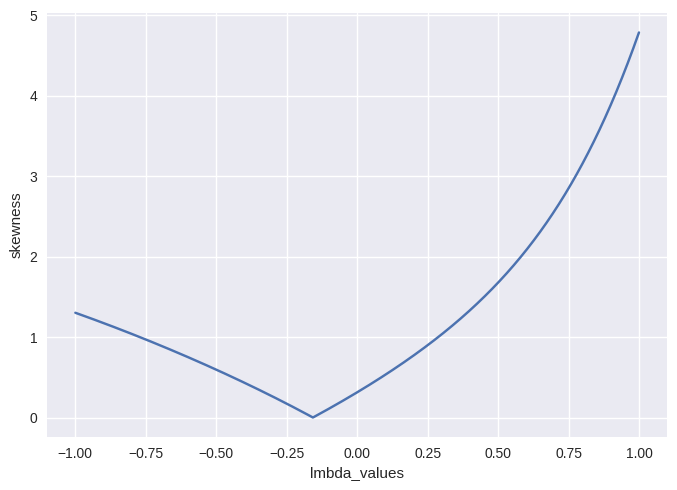

Optimal value of lmbda est:-0.15715715715715717


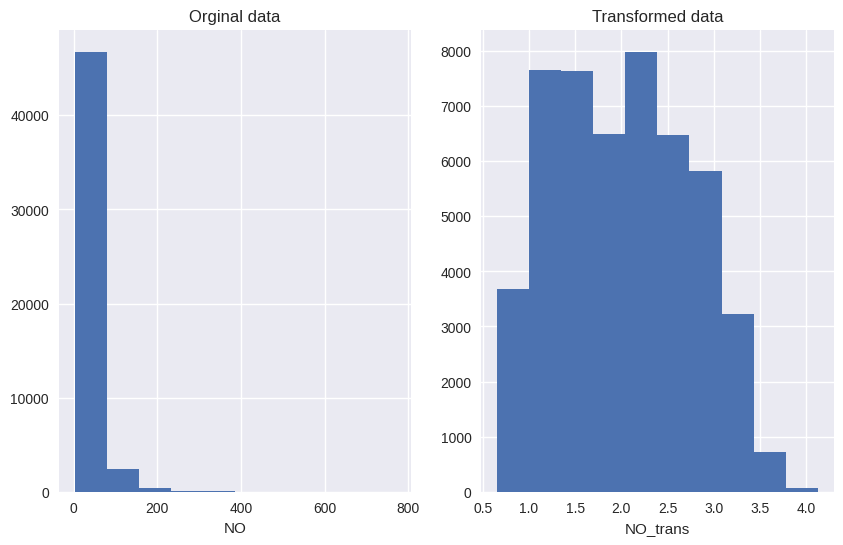

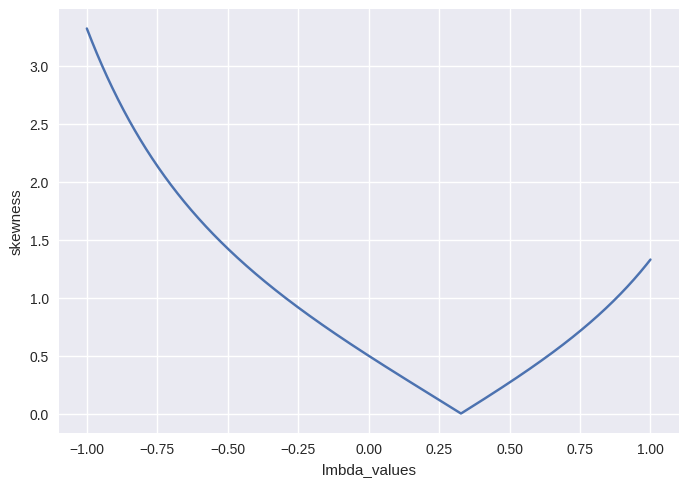

Optimal value of lmbda est:0.3273273273273274


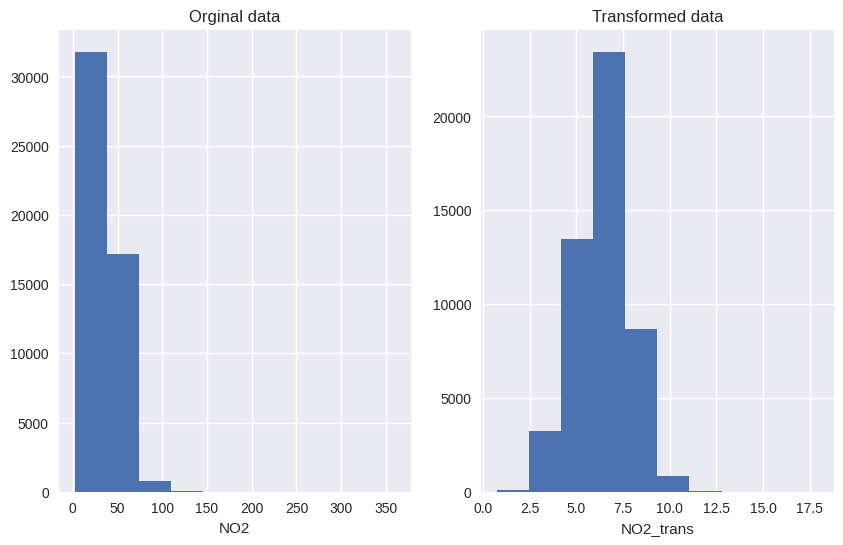

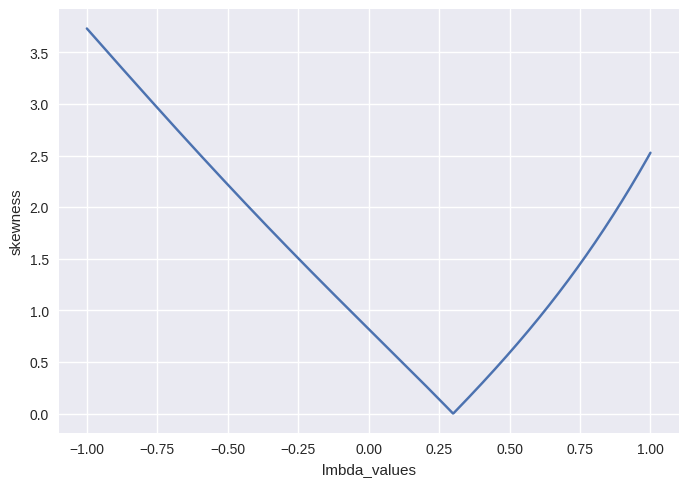

Optimal value of lmbda est:0.2992992992992993


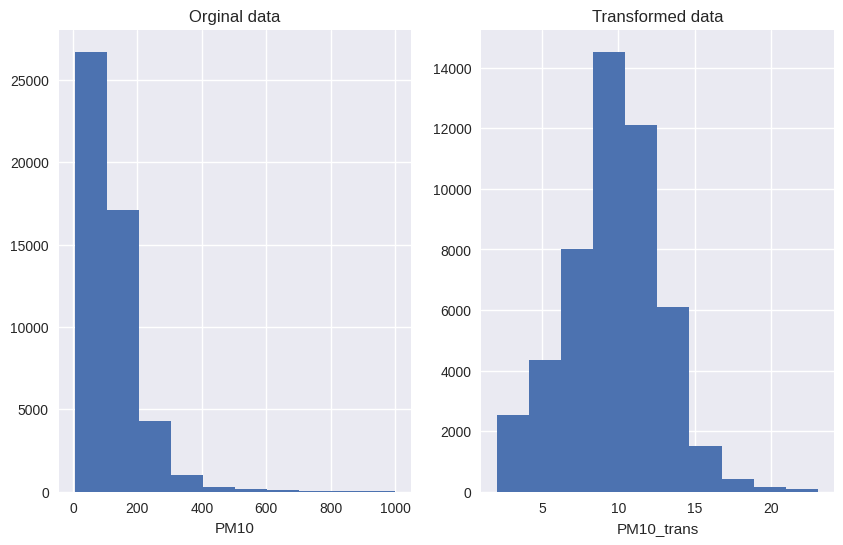

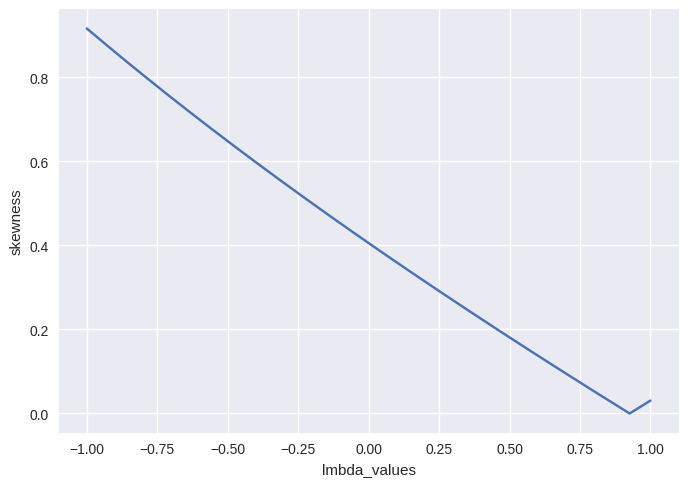

Optimal value of lmbda est:0.9259259259259258


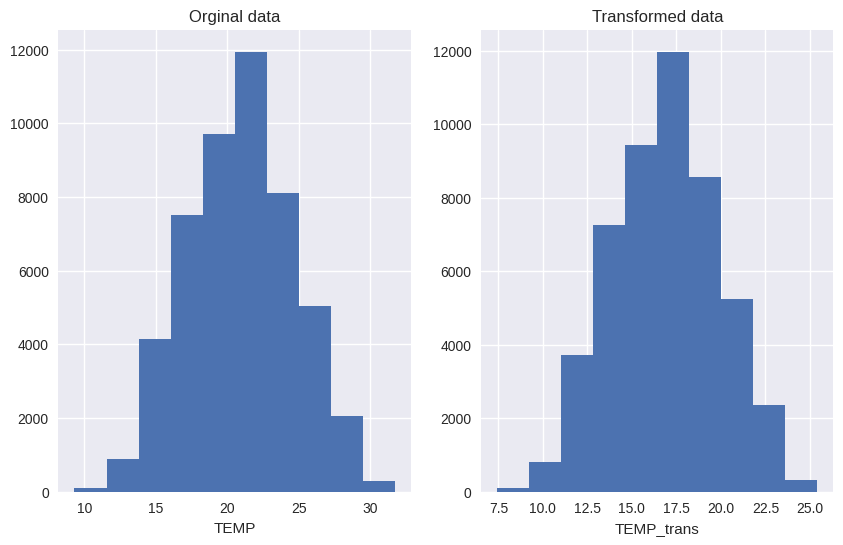

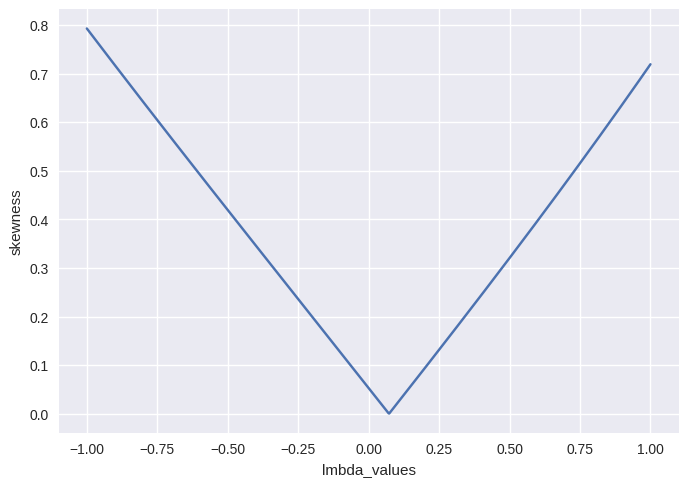

Optimal value of lmbda est:0.07307307307307309


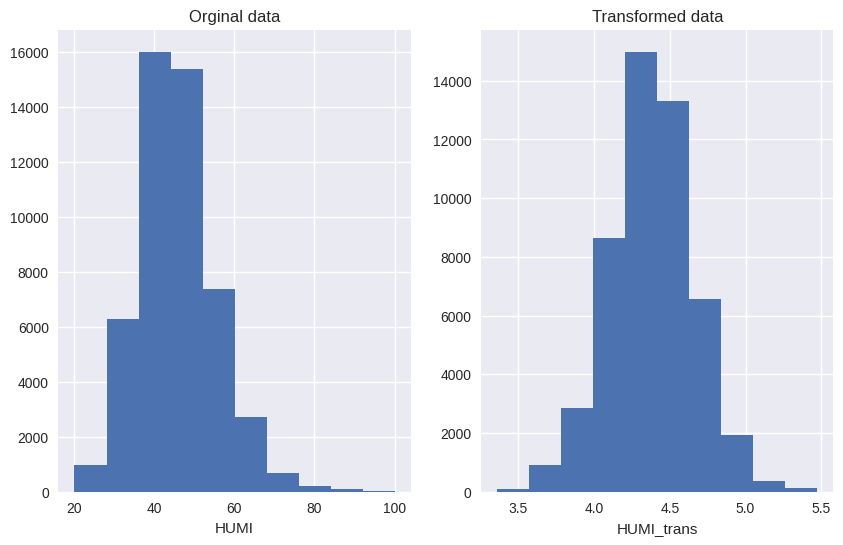

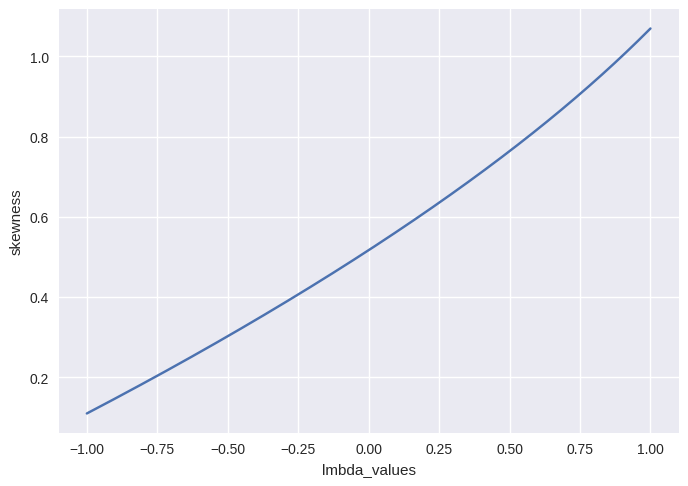

Optimal value of lmbda est:-1.0


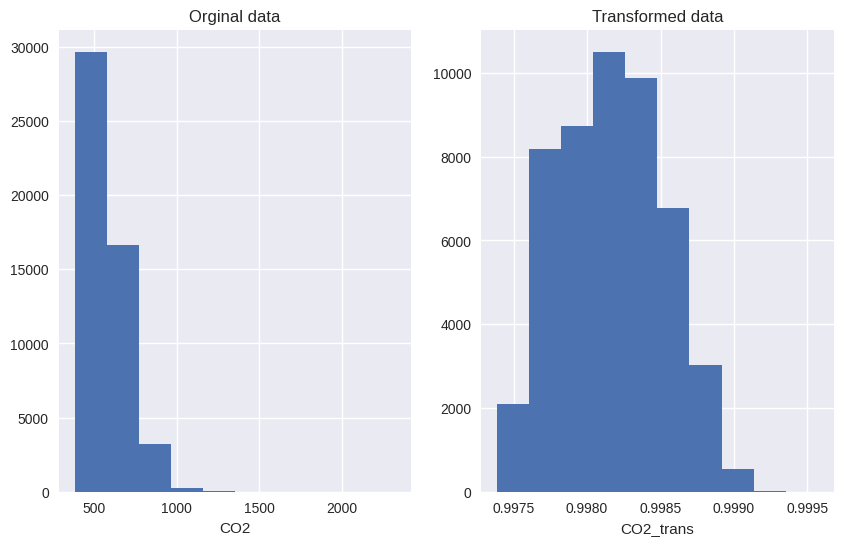

In [29]:
transform_data(chatelet_air,to_transforms)

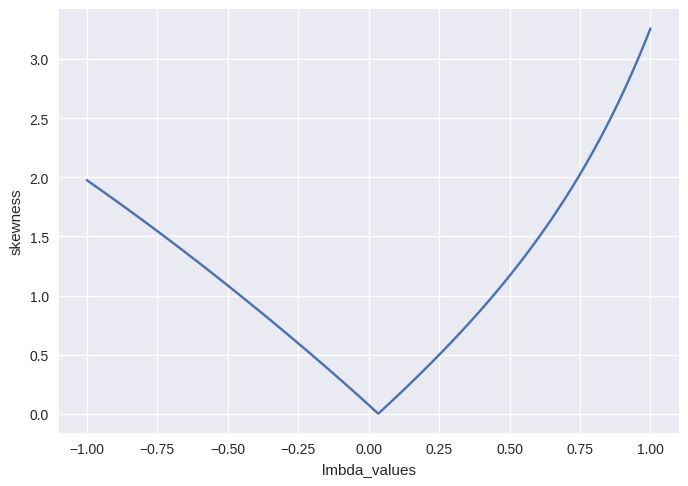

Optimal value of lmbda est:0.03503503503503502


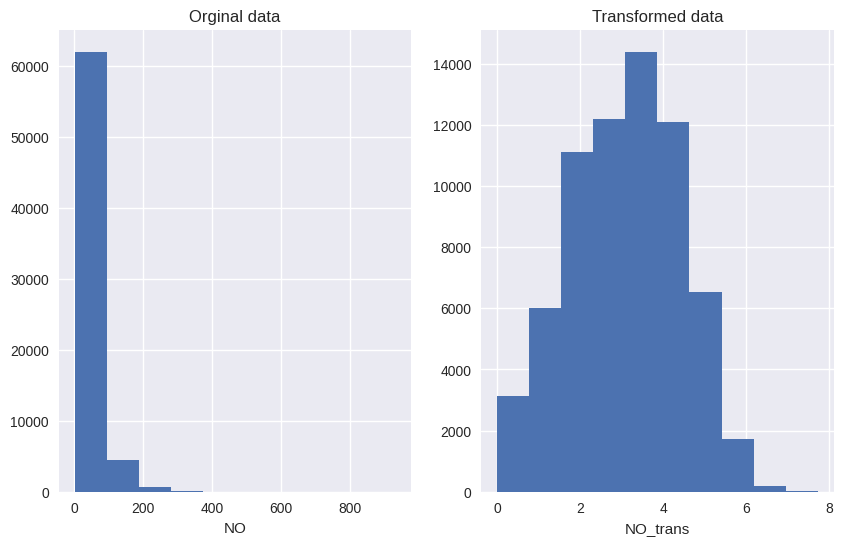

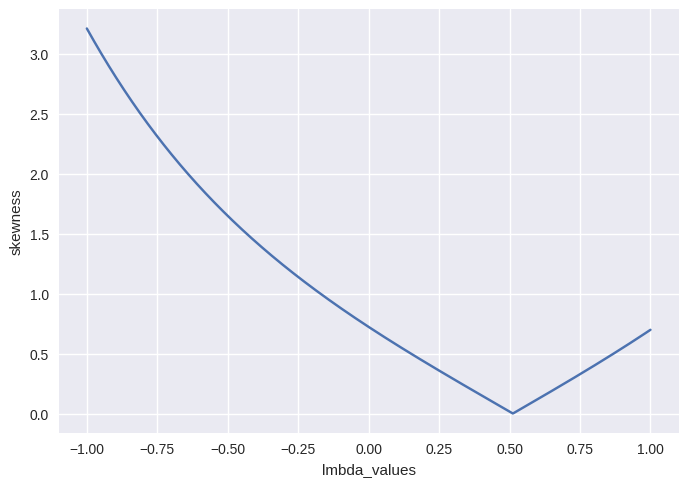

Optimal value of lmbda est:0.5115115115115114


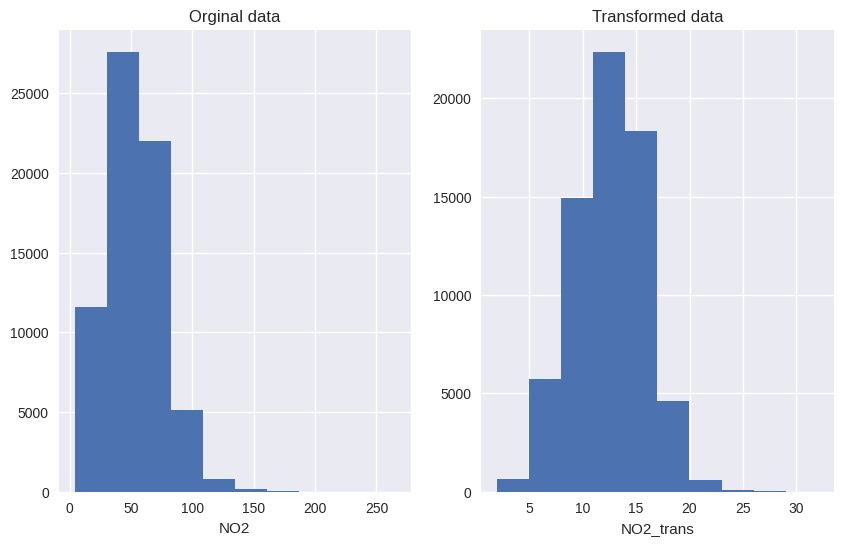

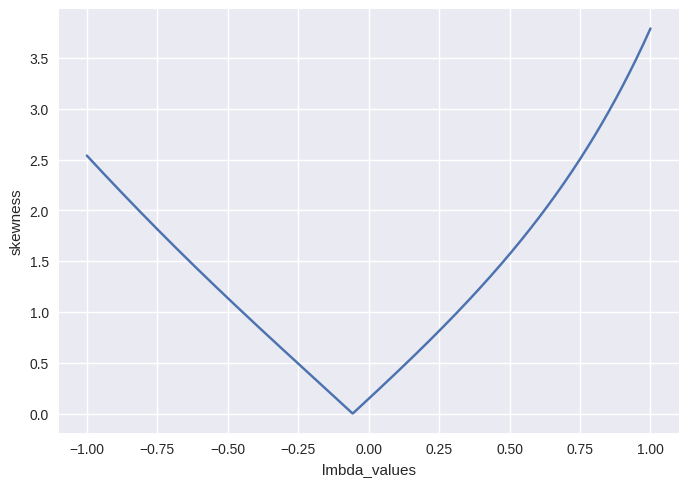

Optimal value of lmbda est:-0.0570570570570571


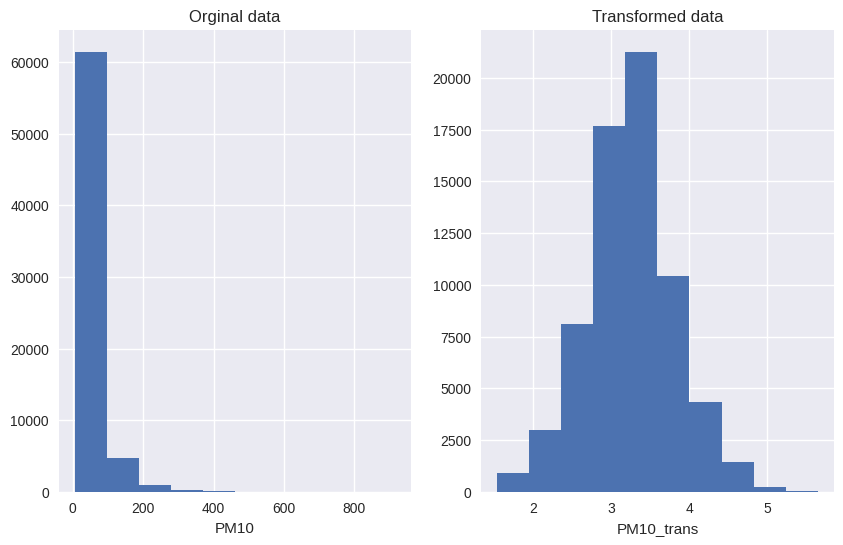

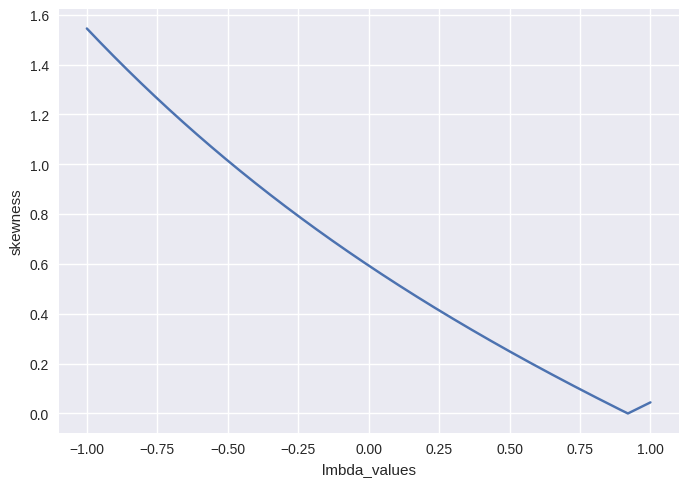

Optimal value of lmbda est:0.91991991991992


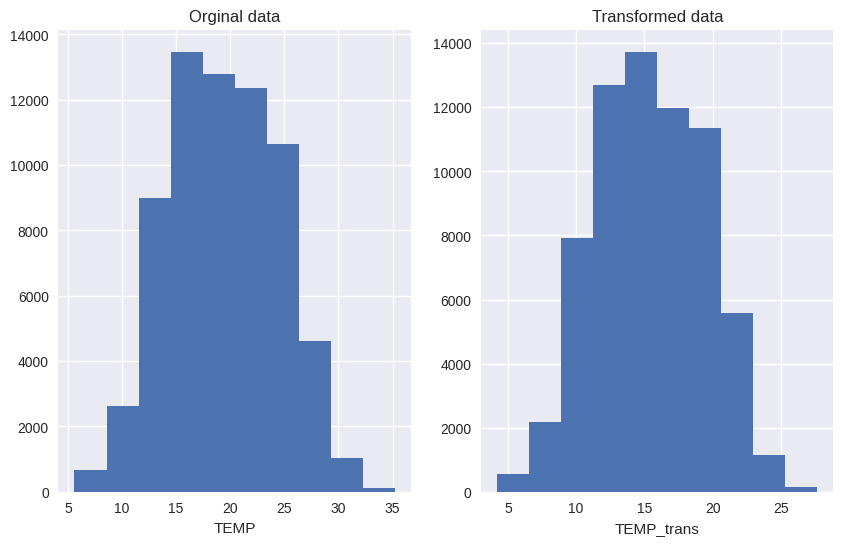

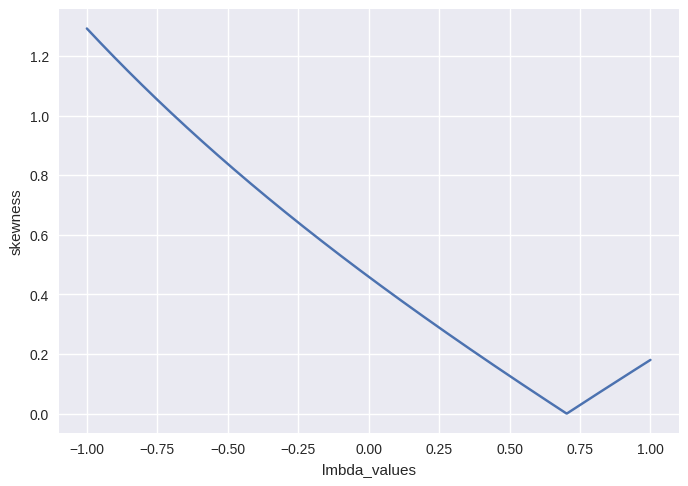

Optimal value of lmbda est:0.7037037037037037


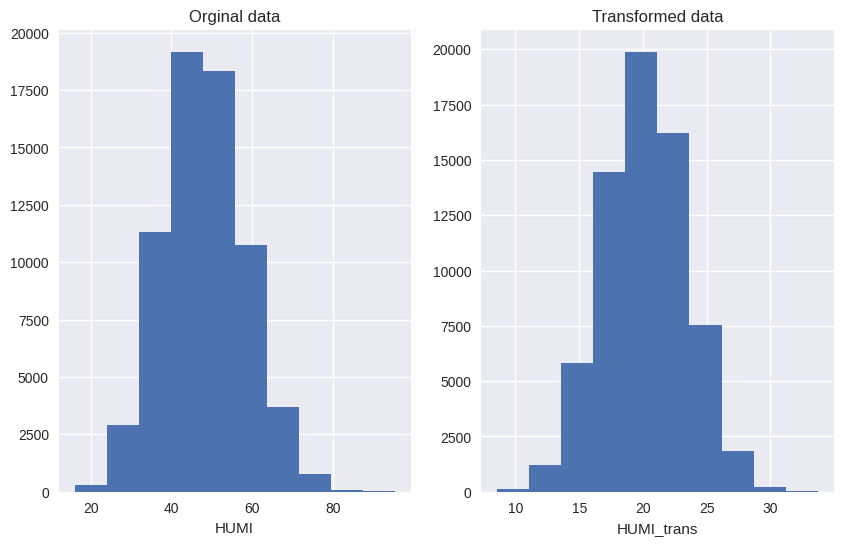

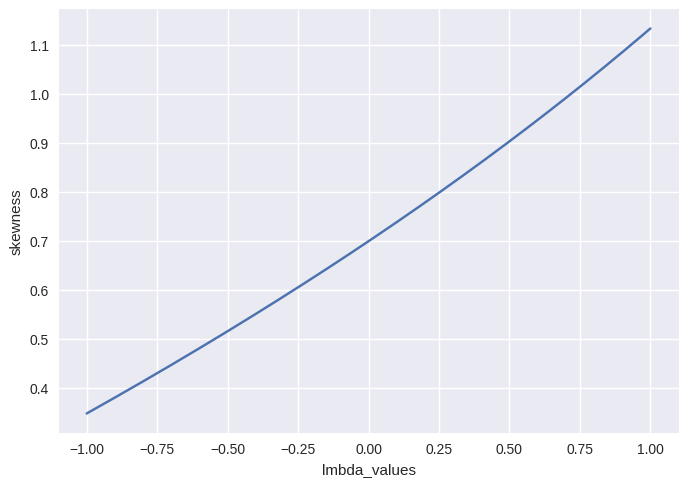

Optimal value of lmbda est:-1.0


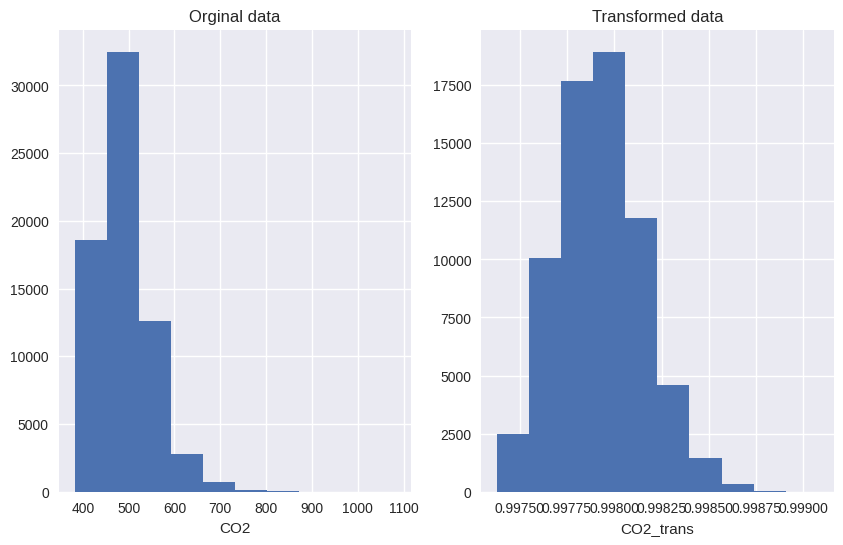

In [30]:
transform_data(roosevelt_air,to_transforms)

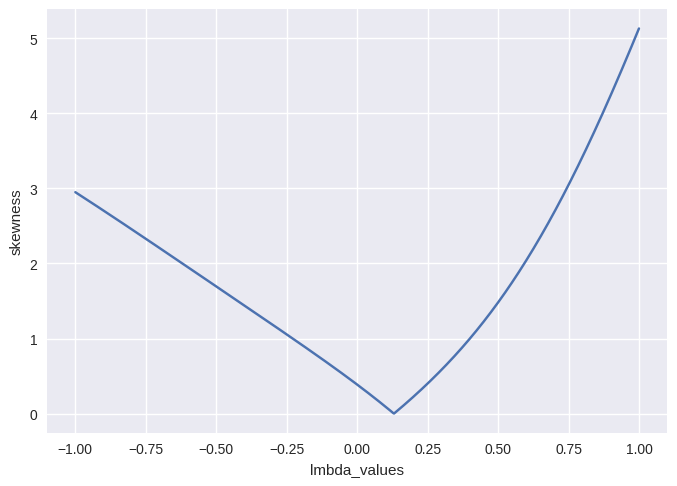

Optimal value of lmbda est:0.13113113113113117


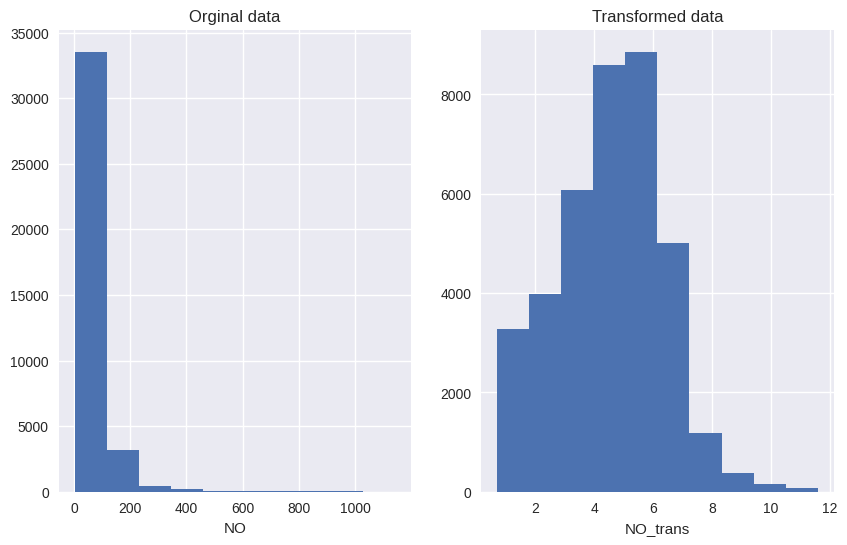

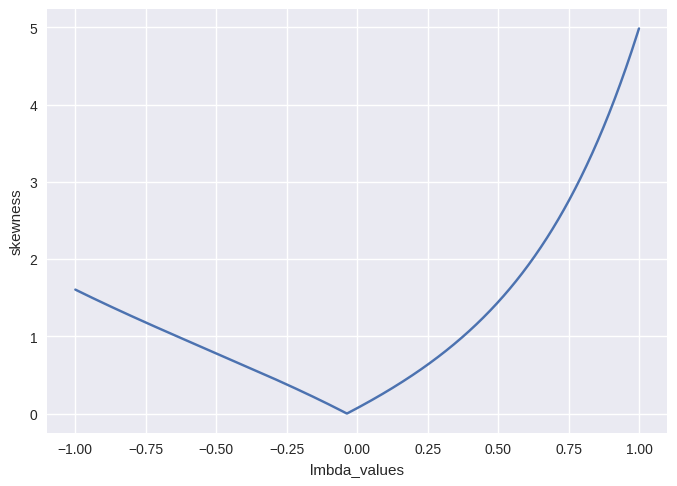

Optimal value of lmbda est:-0.03703703703703709


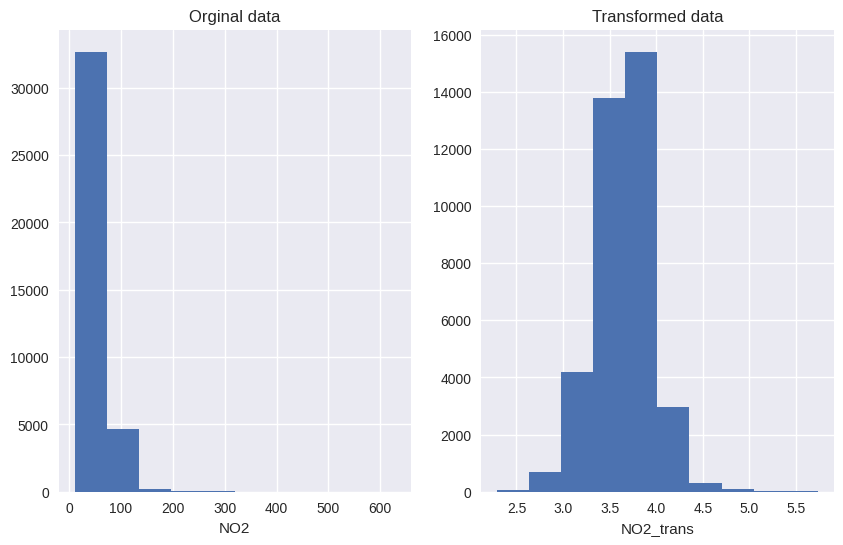

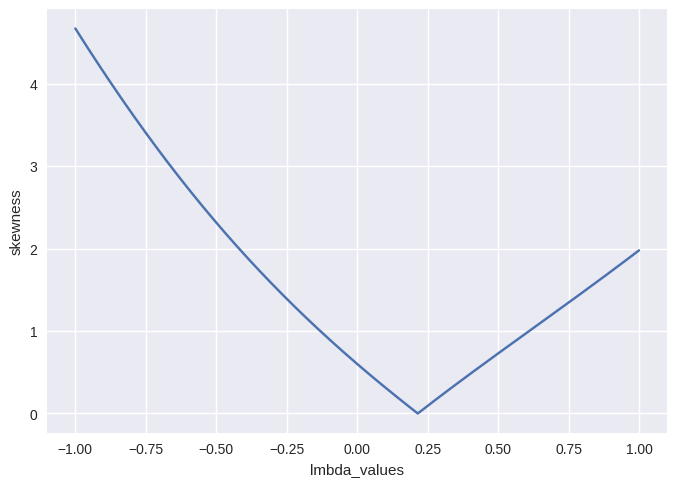

Optimal value of lmbda est:0.21521521521521514


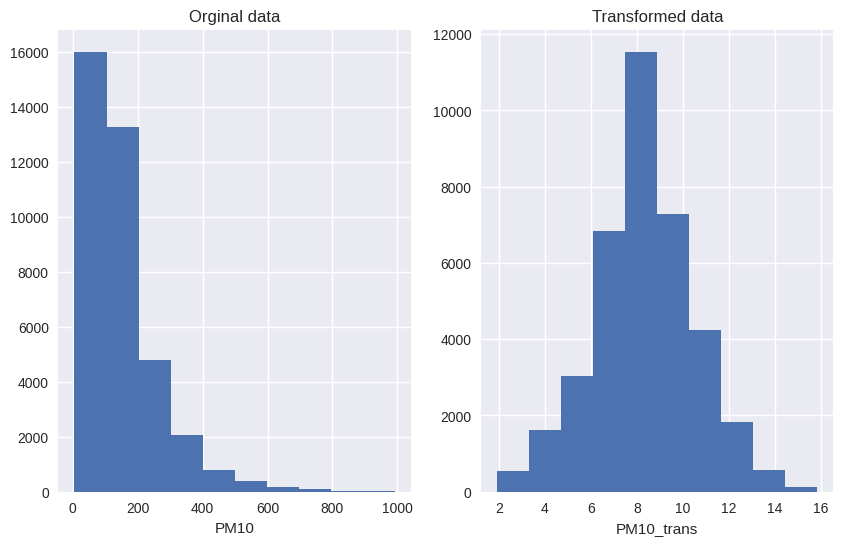

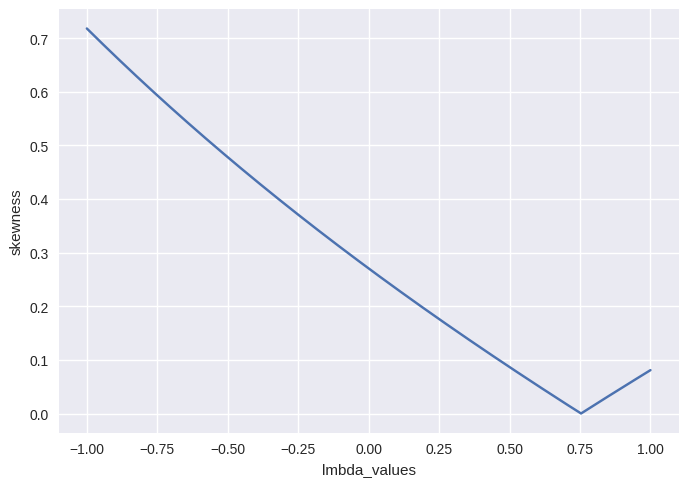

Optimal value of lmbda est:0.7537537537537538


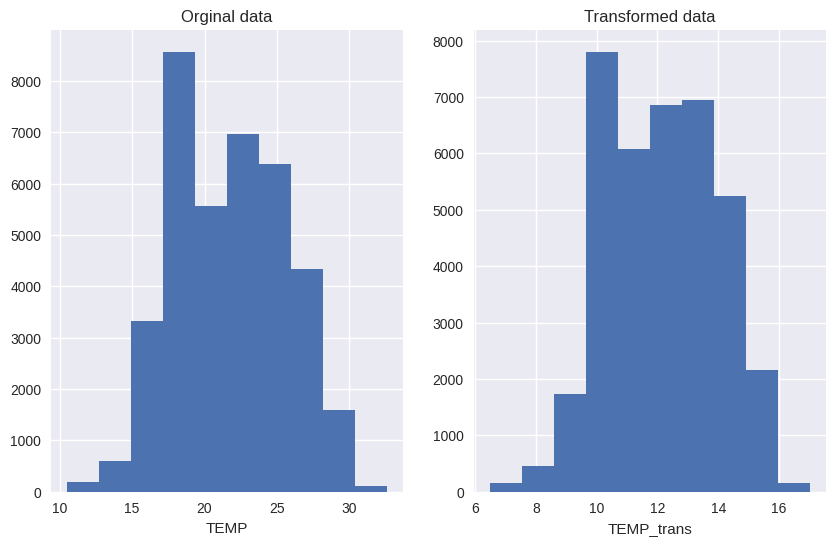

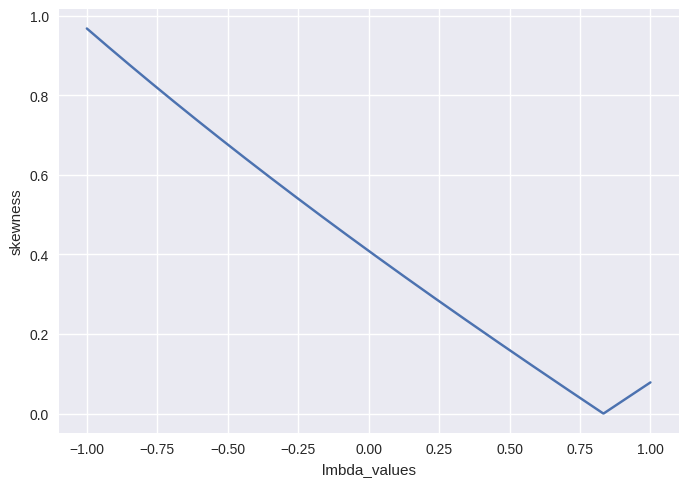

Optimal value of lmbda est:0.8338338338338338


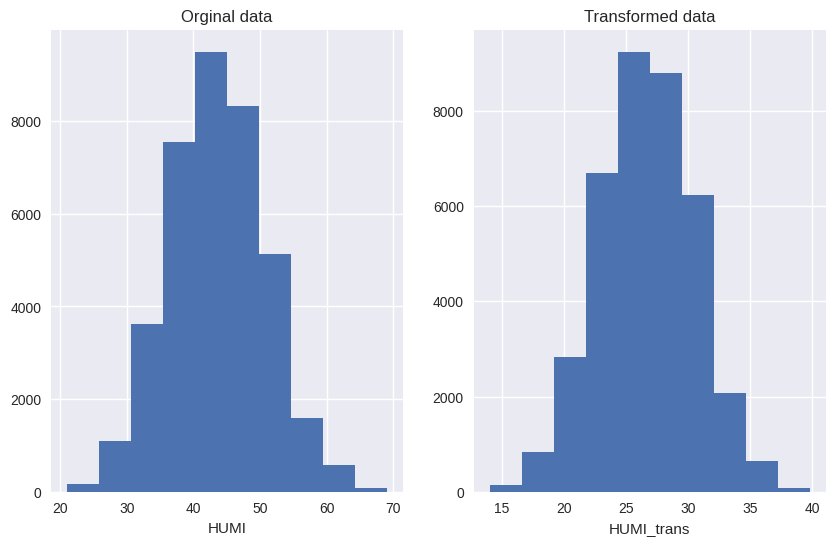

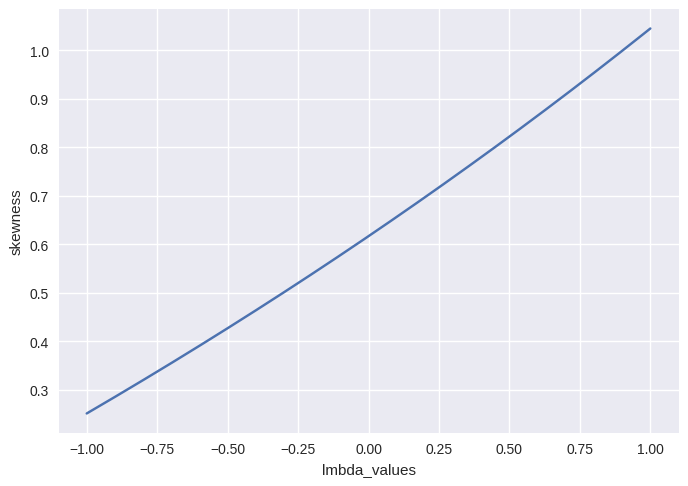

Optimal value of lmbda est:-1.0


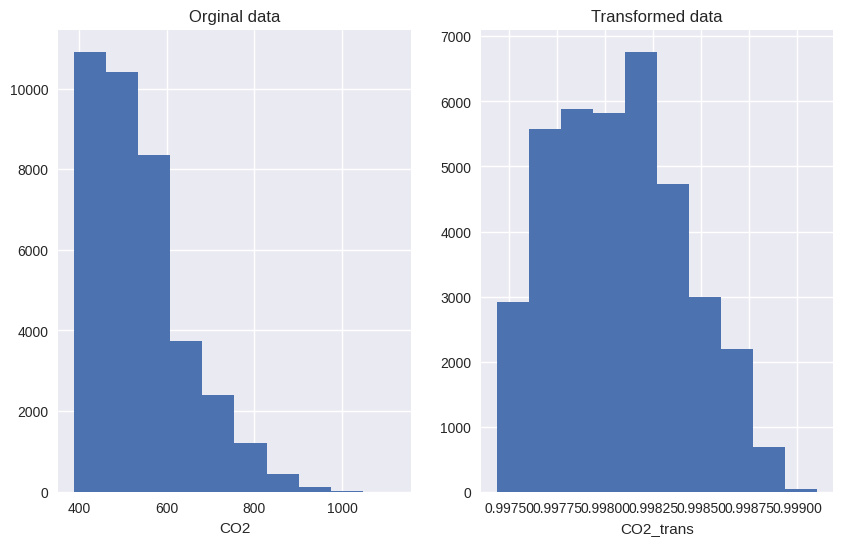

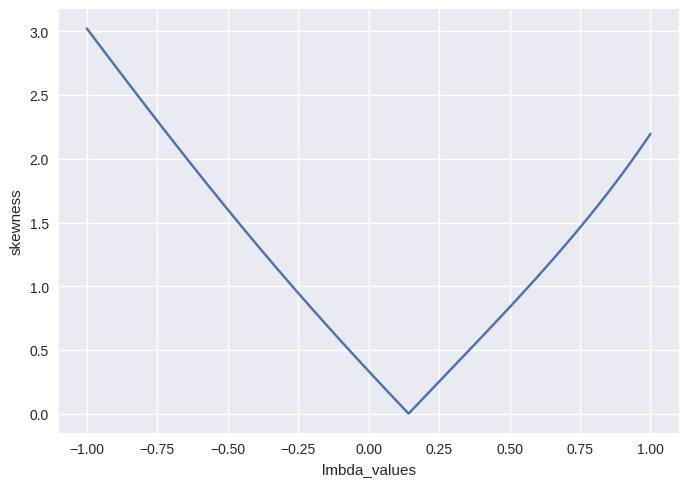

Optimal value of lmbda est:0.14114114114114118


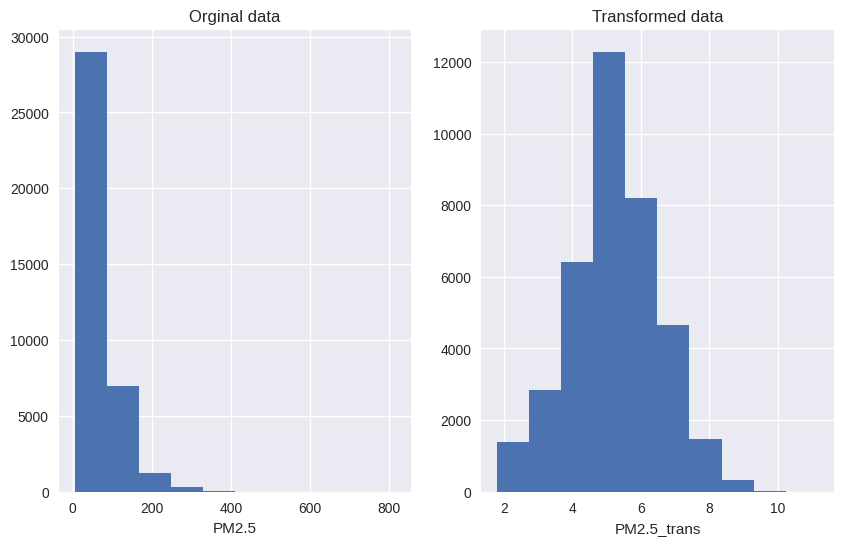

In [31]:
to_transforms_auber=to_transforms

to_transforms_auber.append("PM2.5")

transform_data(auber_air,to_transforms)

### Modelisation

In [32]:
transformed_cols=['NO_trans', 'NO2_trans', 'PM10_trans','TEMP_trans','HUMI_trans','Year',\
    'Day','Month',"Heure"]

restricted_trans_cols=['TEMP_trans','HUMI_trans','Year','Day','Month',"Heure"]

original_cols=['NO', 'NO2', 'PM10', 'TEMP', 'HUMI', 'Heure', 'Day', 'Month','Year']

restricted_ori_cols=['TEMP', 'HUMI', 'Heure', 'Day', 'Month','Year']

In [33]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score

In [34]:
### Data Normalisation
from sklearn.preprocessing import StandardScaler,RobustScaler

def normalize_num_cols(df,scaler):

    df_standard=df.copy()

    standardizing=scaler()
    
    numerical_cols=df.columns[df.nunique()>2]

    standar_col_num=standardizing.fit_transform(df[numerical_cols])

    df_standard[numerical_cols]=standar_col_num

    return df_standard

In [35]:
Regressors=[LinearRegression,RandomForestRegressor,KNeighborsRegressor,PLSRegression,DecisionTreeRegressor]



def get_metrics(Regressors,train_set,train_label,cv=50):

    col=["Name","mse_mean","r2_mean","mse_std","r2_std"]

    df=pd.DataFrame(columns=col)

    for regressor in Regressors:

        Name=regressor.__name__

        model=regressor()
        
        mse_list=cross_val_score(model,train_set,train_label,scoring="neg_mean_squared_error",cv=cv)
        mse=np.mean(mse_list)

        r2_list=cross_val_score(model,train_set,train_label,scoring="r2",cv=cv)
        r2=np.mean(r2_list)

        mse_std=np.std(mse_list)
        r2_std=np.std(r2_list)
       
        df1=pd.DataFrame([[Name,mse,r2,mse_std,r2_std]],columns=col)
        df=df.append(df1)

    return df

In [36]:
def process_splitting(df,column_choice,target):

    X=df[column_choice]

    y=df[target]

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

    return X_train,X_test,y_train,y_test

### Comparaison of transformed vs orginals columns

In [37]:
X_train,X_test,y_train,y_test=process_splitting(chatelet_air,restricted_ori_cols,"CO2")

df_metric_original_cols=get_metrics(Regressors,X_train,y_train,cv=30)

In [38]:
df_metric_original_cols

,Name,mse_mean,r2_mean,mse_std,r2_std
0,LinearRegression,-10470.826479,0.296484,720.153565,0.027908
0,RandomForestRegressor,-2588.649259,0.827115,561.198360,0.030640
0,KNeighborsRegressor,-3290.164966,0.779256,500.456420,0.027338
0,PLSRegression,-10495.444889,0.294848,725.603288,0.027934
0,DecisionTreeRegressor,-4641.361712,0.679098,445.068702,0.032328


In [39]:
df_metric_original_cols.to_csv("df_metric_original_cols.csv",index=False)

In [40]:
X_train,X_test,y_train,y_test=process_splitting(chatelet_air,restricted_trans_cols ,"CO2")

df_metric_transformed_cols=get_metrics(Regressors,X_train,y_train,cv=30)

In [41]:
df_metric_transformed_cols

,Name,mse_mean,r2_mean,mse_std,r2_std
0,LinearRegression,-10369.323157,0.290096,740.770476,0.023647
0,RandomForestRegressor,-2510.551738,0.829618,506.006442,0.025553
0,KNeighborsRegressor,-2350.915351,0.839949,545.662773,0.026496
0,PLSRegression,-10391.988588,0.288575,749.987820,0.023747
0,DecisionTreeRegressor,-4559.081510,0.680823,615.616751,0.060681


In [42]:
df_metric_transformed_cols.to_csv("df_metric_transformed_cols.csv",index=False)

After testing the score of model on X_test, y_test with transformed cols and originals cols with notice that the model performs well on the transformed to follow normal distribution. Afterward, the standization look to not affect the data when we choose transformed columns.

- Challenge have to transform the target from transformed to originals after prediction.

# CO2 Prediction

In [40]:
### Before optimization

X_train,X_test,y_train,y_test=process_splitting(chatelet_air,restricted_trans_cols,"CO2_trans")

RFR=RandomForestRegressor(n_jobs=-1)

RFR.fit(X_train,y_train)

RFR.score(X_test,y_test)

0.839892442625072

### Gridsearch

from datetime import datetime
from sklearn.model_selection import GridSearchCV

## Define Grid 
grid = { 
    'n_estimators': [500,700,800,1000],
    'max_features': ['sqrt','log2'],
    'max_depth' : [10,15,20,25]
}

## show start time
print(datetime.now())## Grid Search function

CV_rfr= GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 30)
CV_rfr.fit(X_train.iloc[:2000,:], y_train[:2000])## show end time

print(datetime.now())

print(f"The best parameters are:{CV_rfr.best_params_} with the score: {CV_rfr.best_score_}")

Best parameters:\
'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 700, 'random_state': 5

'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500

In [41]:
from scipy.special import inv_boxcox
from sklearn import metrics


def make_regression(df,target,predictor_cols,model,lmbda):

    X_train,X_test,y_train,y_test=process_splitting(df,predictor_cols,target)


    model.fit(X_train,y_train)

    trans_target_predicted=model.predict(X_test)

    target_predicted=inv_boxcox(trans_target_predicted,lmbda)
    target_test=inv_boxcox(y_test,lmbda)

    print(f"Mean absolute error: {metrics.mean_absolute_error(target_test,target_predicted):.2f}")
    print(f"Mean absolute error percentage: {metrics.mean_absolute_percentage_error(target_test,target_predicted):.2%}")

    plt.rcParams.update({"font.size":18})
    plt.plot(target_predicted,target_test,'o')
    #plt.plot([100,6000],[100,600],"r-")
    #plt.axis([100,600,100,600])
    plt.xlabel(target+" predicted")
    plt.ylabel(target[:7])
    plt.show()

    feature_importance=pd.DataFrame({"Importance":100*model.feature_importances_},index=X_train.columns)
    feature_importance.sort_values("Importance",ascending=False).plot(kind="bar",figsize=(14,10),\
                                                                     title="Feature importance")
    plt.show()

# lmbda values for columns transformed

In [42]:
chatelet_lmbda={"NO":-0.15715715715715717,"NO2":0.3273273273273274,"PM10":0.2992992992992993,\
               "CO2":-1}

auber_lmbda={"NO":0.13113113113113117,"NO2":-0.03703703703703709,"PM10":0.21521521521521514,\
             "CO2":-1,"PM2.5":0.14114114114114118}

roosevelt_lmbda={"NO":0.03503503503503502,"NO2":0.5115115115115114,"PM10":-0.0570570570570571,"CO2":-1}

# CO2 prediction

from datetime import datetime
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test=process_splitting(chatelet_air,restricted_trans_cols,"CO2_trans")
## Define Grid 
grid = { 
    'n_estimators': [500,700,800,1000],
    'max_features': ['sqrt','log2'],
    'max_depth' : [10,15,20,25]
}

## show start time
print(datetime.now())## Grid Search function

CV_rfr= GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 30)
CV_rfr.fit(X_train.iloc[:10000,:], y_train[:10000])## show end time

print(datetime.now())

print(f"The best parameters are:{CV_rfr.best_params_} with the score: {CV_rfr.best_score_}")

Mean absolute error: 31.05
Mean absolute error percentage: 5.23%


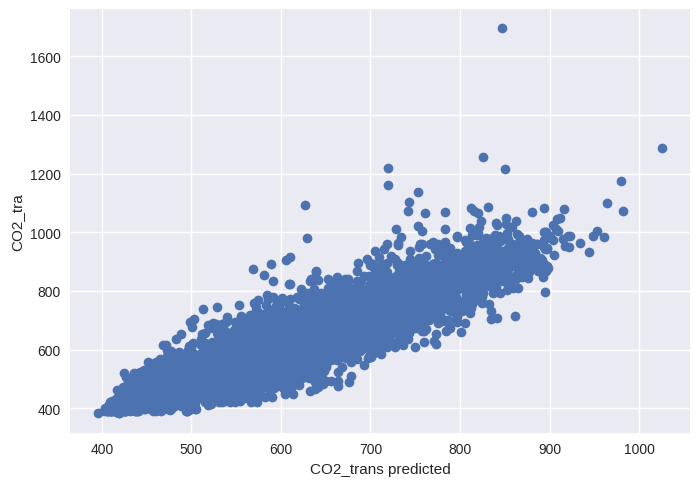

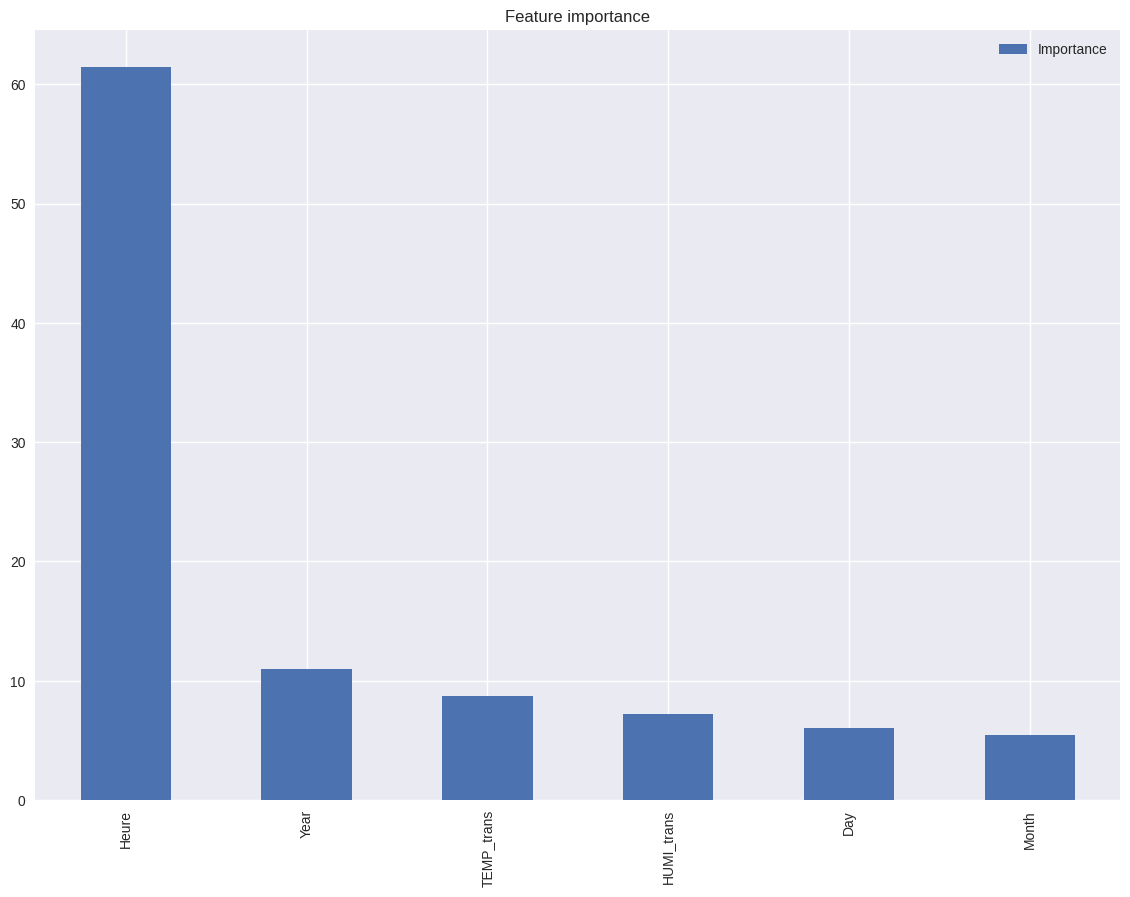

In [43]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=800,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(chatelet_air,"CO2_trans",restricted_trans_cols,model,lmbda=chatelet_lmbda["CO2"])

# PM10 prediction

from datetime import datetime
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test=process_splitting(chatelet_air,restricted_trans_cols,"PM10_trans")
## Define Grid 
grid = { 
    'n_estimators': [500,700,800,1000],
    'max_features': ['sqrt','log2'],
    'max_depth' : [10,15,20,25]
}

## show start time
print(datetime.now())## Grid Search function

CV_rfr= GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 30)
CV_rfr.fit(X_train.iloc[:10000,:], y_train[:10000])## show end time

print(datetime.now())

print(f"The best parameters are:{CV_rfr.best_params_} with the score: {CV_rfr.best_score_}")

Mean absolute error: 24.89
Mean absolute error percentage: 33.61%


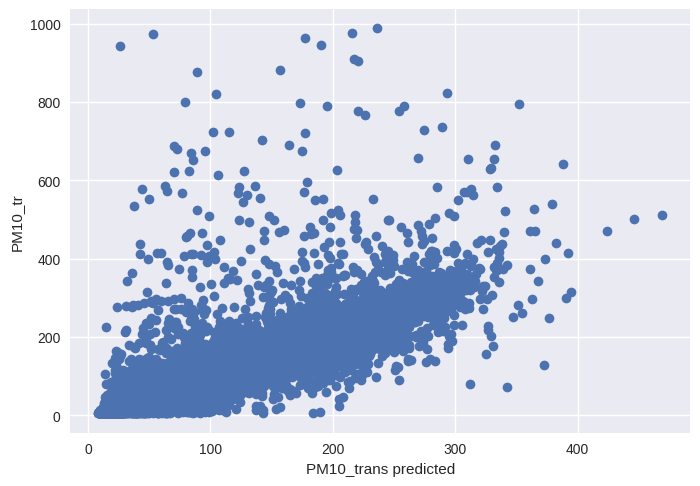

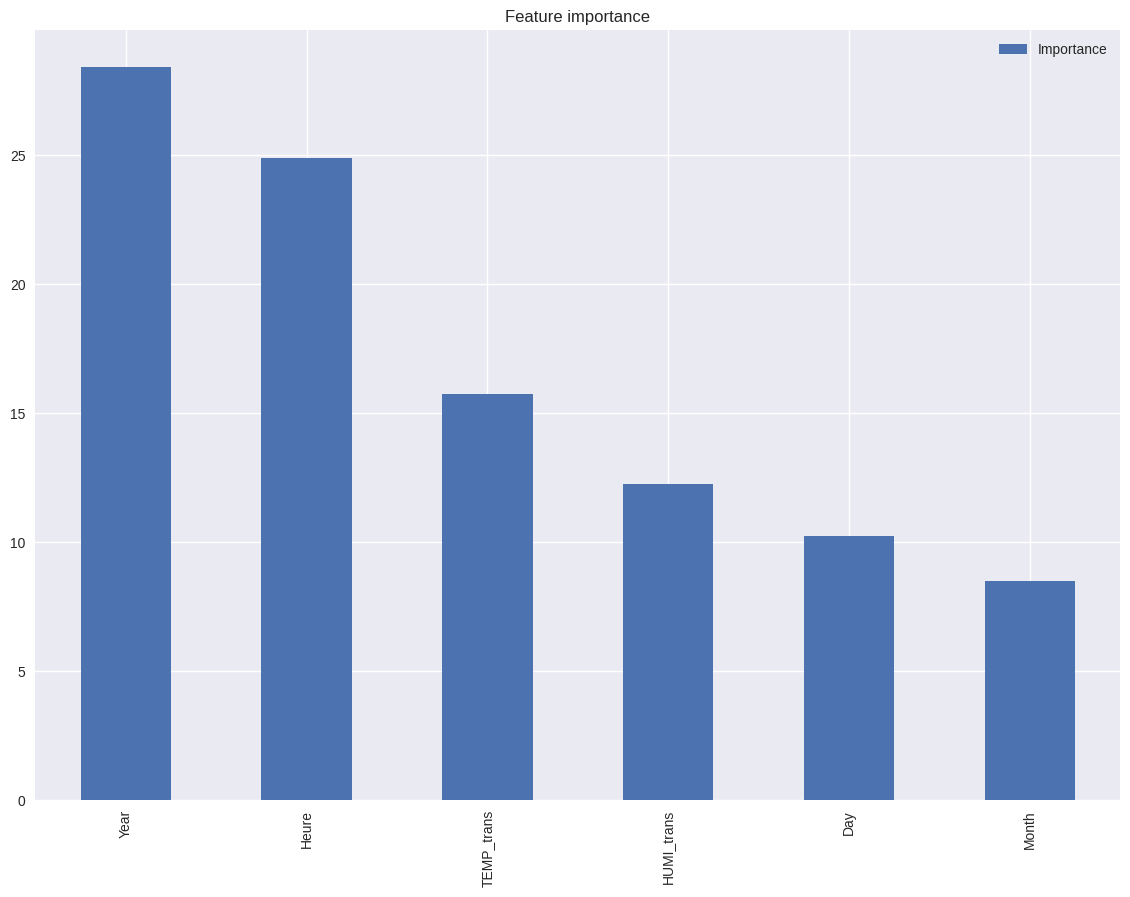

In [44]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=800,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(chatelet_air,"PM10_trans",restricted_trans_cols,model,lmbda=chatelet_lmbda["PM10"])

# NO prediction

from datetime import datetime
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test=process_splitting(chatelet_air,restricted_trans_cols,"NO_trans")
## Define Grid 
grid = { 
    'n_estimators': [500,700,800,1000],
    'max_features': ['sqrt','log2'],
    'max_depth' : [10,15,20,25]
}

## show start time
print(datetime.now())## Grid Search function

CV_rfr= GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 30)
CV_rfr.fit(X_train.iloc[:10000,:], y_train[:10000])## show end time

print(datetime.now())

print(f"The best parameters are:{CV_rfr.best_params_} with the score: {CV_rfr.best_score_}")

Mean absolute error: 10.32
Mean absolute error percentage: 43.82%


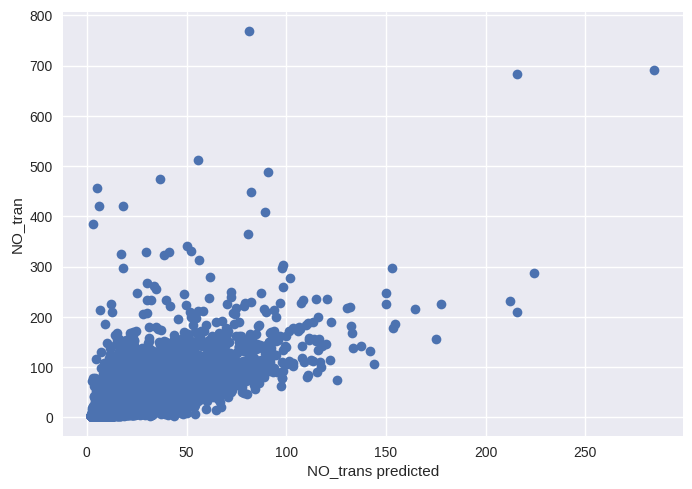

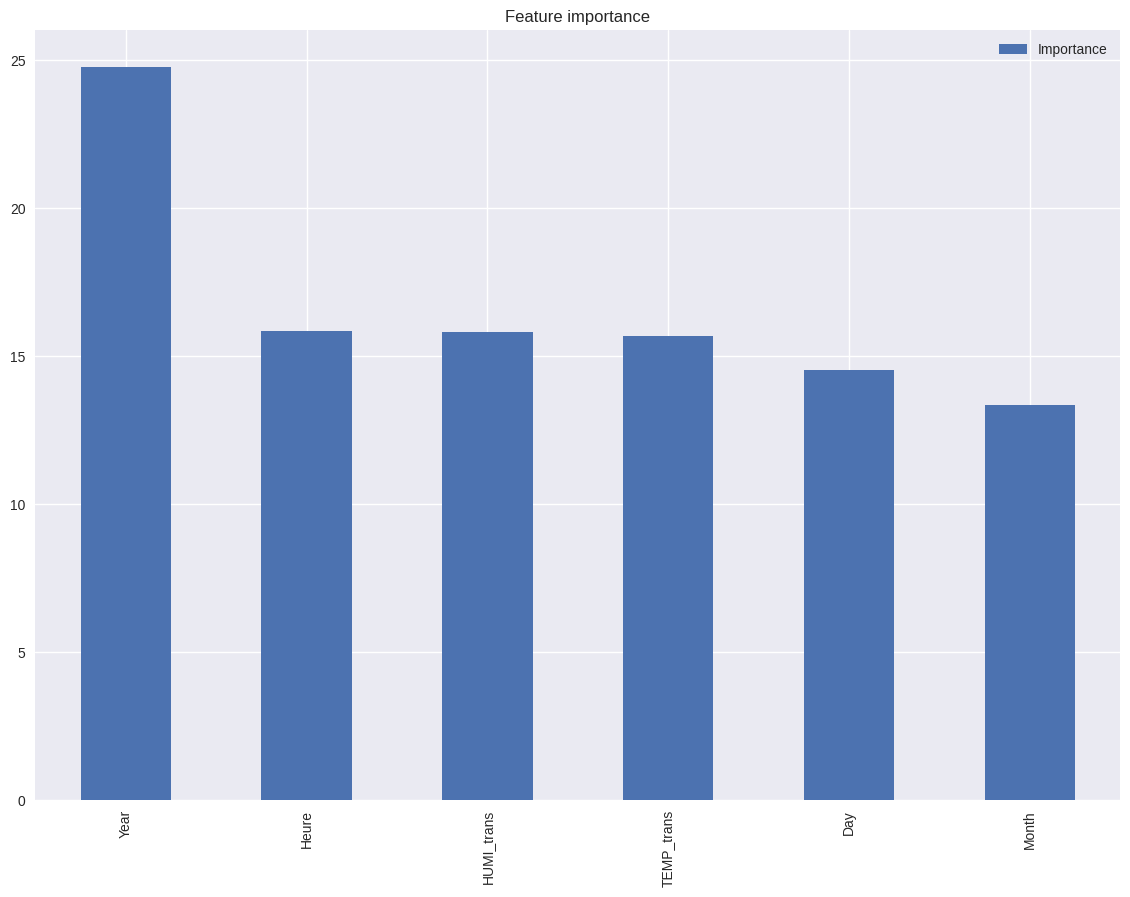

In [45]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=1000,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(chatelet_air,"NO_trans",restricted_trans_cols,model,lmbda=chatelet_lmbda["NO"])

# NO2 prediction

from datetime import datetime
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test=process_splitting(chatelet_air,restricted_trans_cols,"NO2_trans")
## Define Grid 
grid = { 
    'n_estimators': [500,700,800,1000],
    'max_features': ['sqrt','log2'],
    'max_depth' : [10,15,20,25]
}

## show start time
print(datetime.now())## Grid Search function

CV_rfr= GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 30)
CV_rfr.fit(X_train.iloc[:10000,:], y_train[:10000])## show end time

print(datetime.now())

print(f"The best parameters are:{CV_rfr.best_params_} with the score: {CV_rfr.best_score_}")

Mean absolute error: 5.33
Mean absolute error percentage: 17.53%


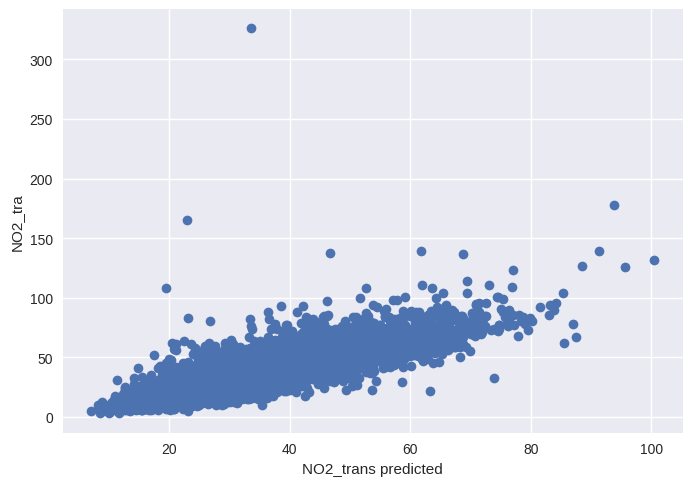

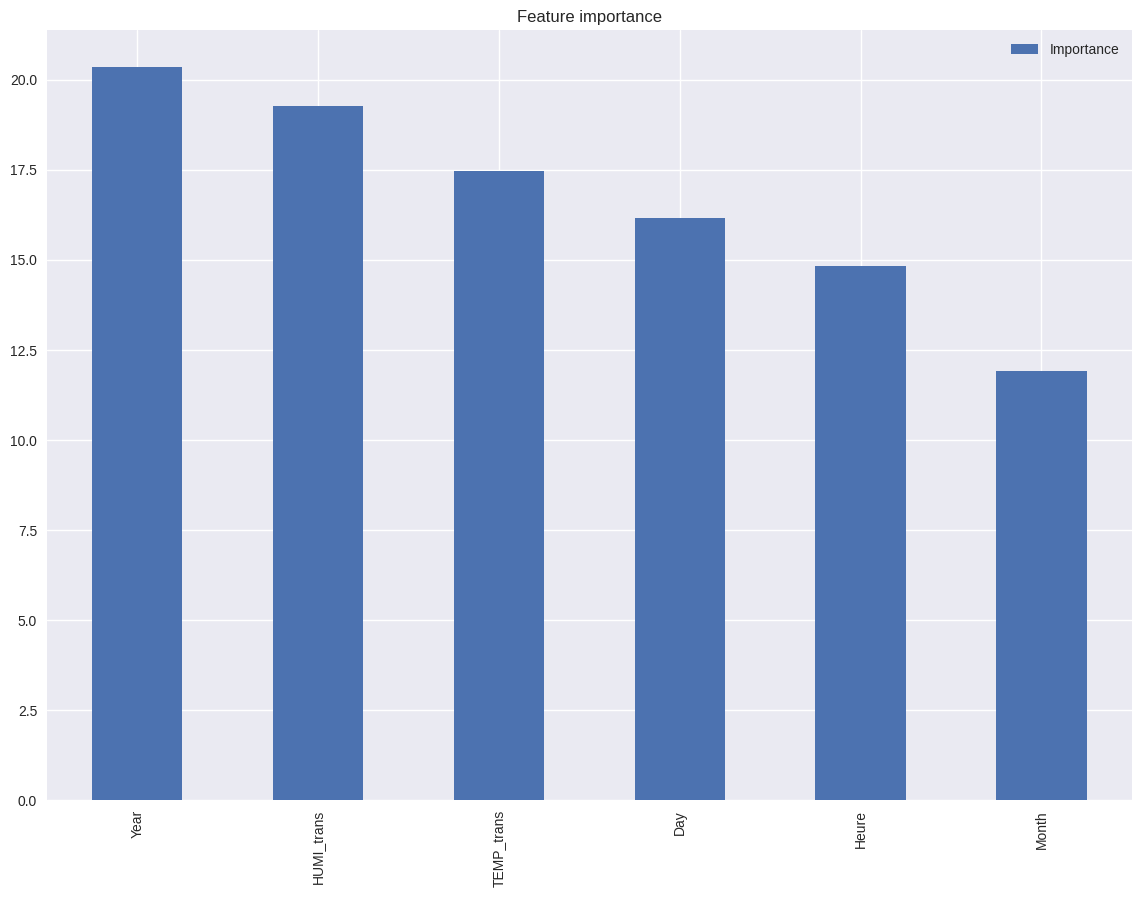

In [46]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=1000,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(chatelet_air,"NO2_trans",restricted_trans_cols,model,lmbda=chatelet_lmbda["NO2"])

Mean absolute error: 16.21
Mean absolute error percentage: 29.67%


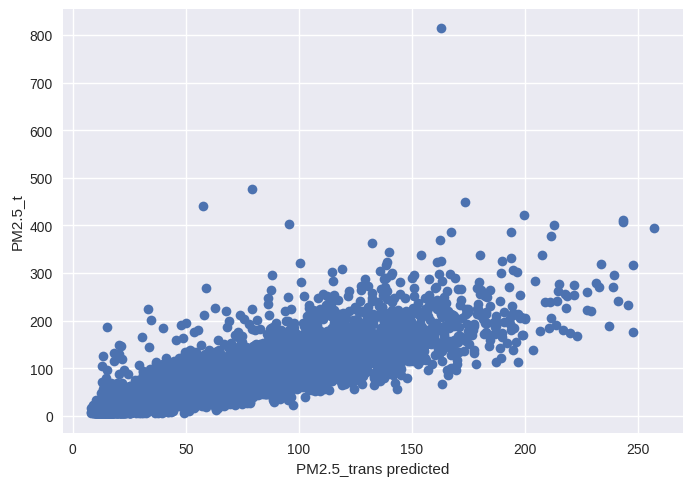

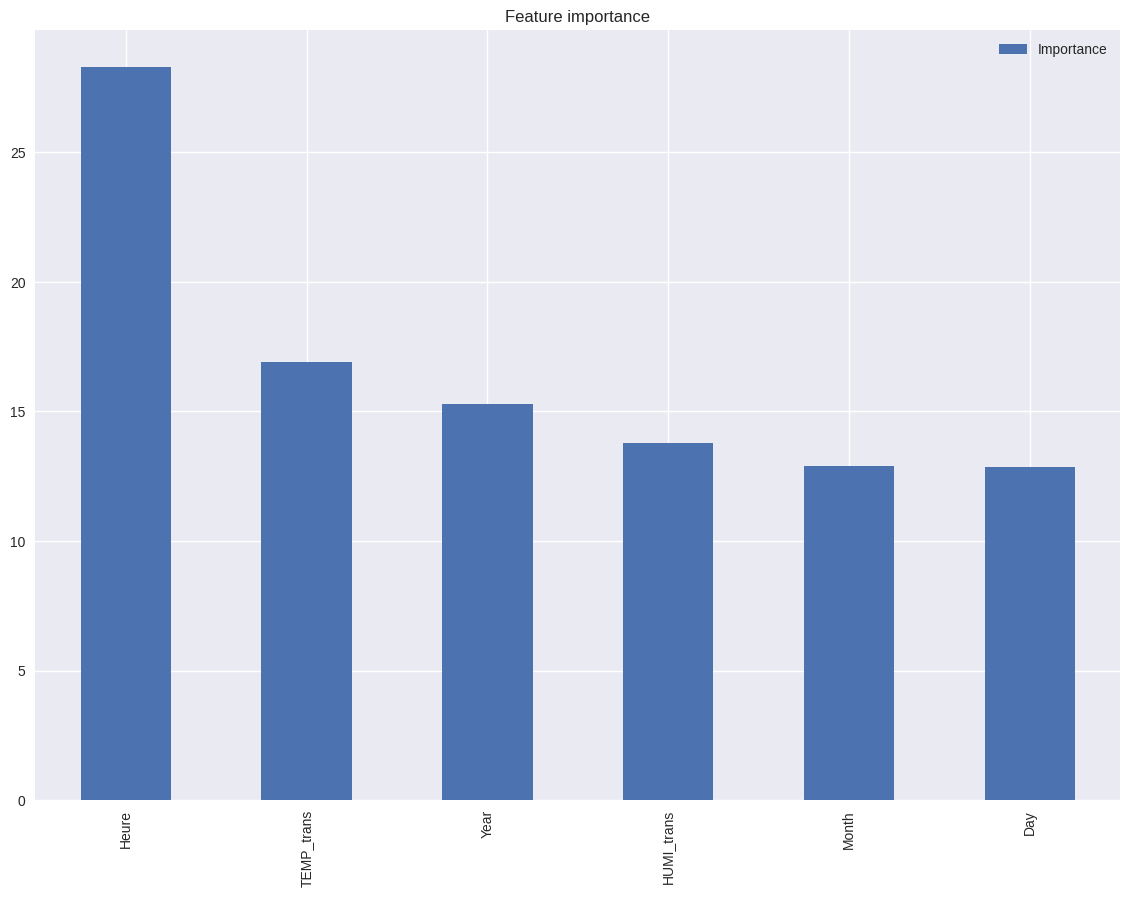

In [47]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=1000,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(auber_air,"PM2.5_trans",restricted_trans_cols,model,lmbda=auber_lmbda["PM2.5"])

### Does it help to also consider current CO2 level

In [48]:
restricted_trans_cols=['TEMP_trans','HUMI_trans','Year','Day','Month',"Heure","CO2_trans"]

Mean absolute error: 25.22
Mean absolute error percentage: 29.88%


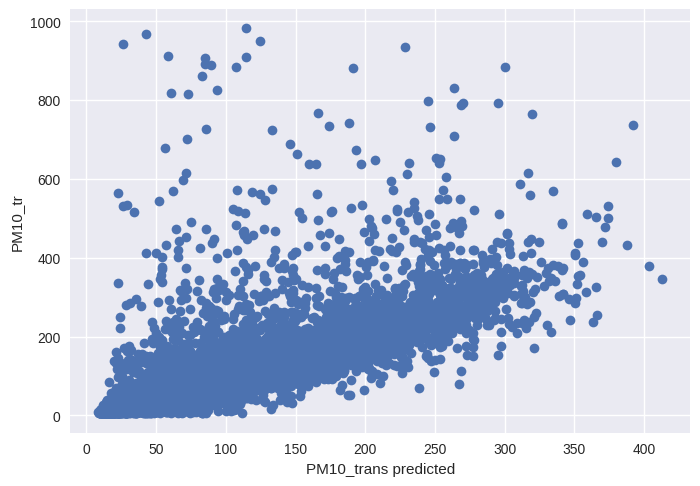

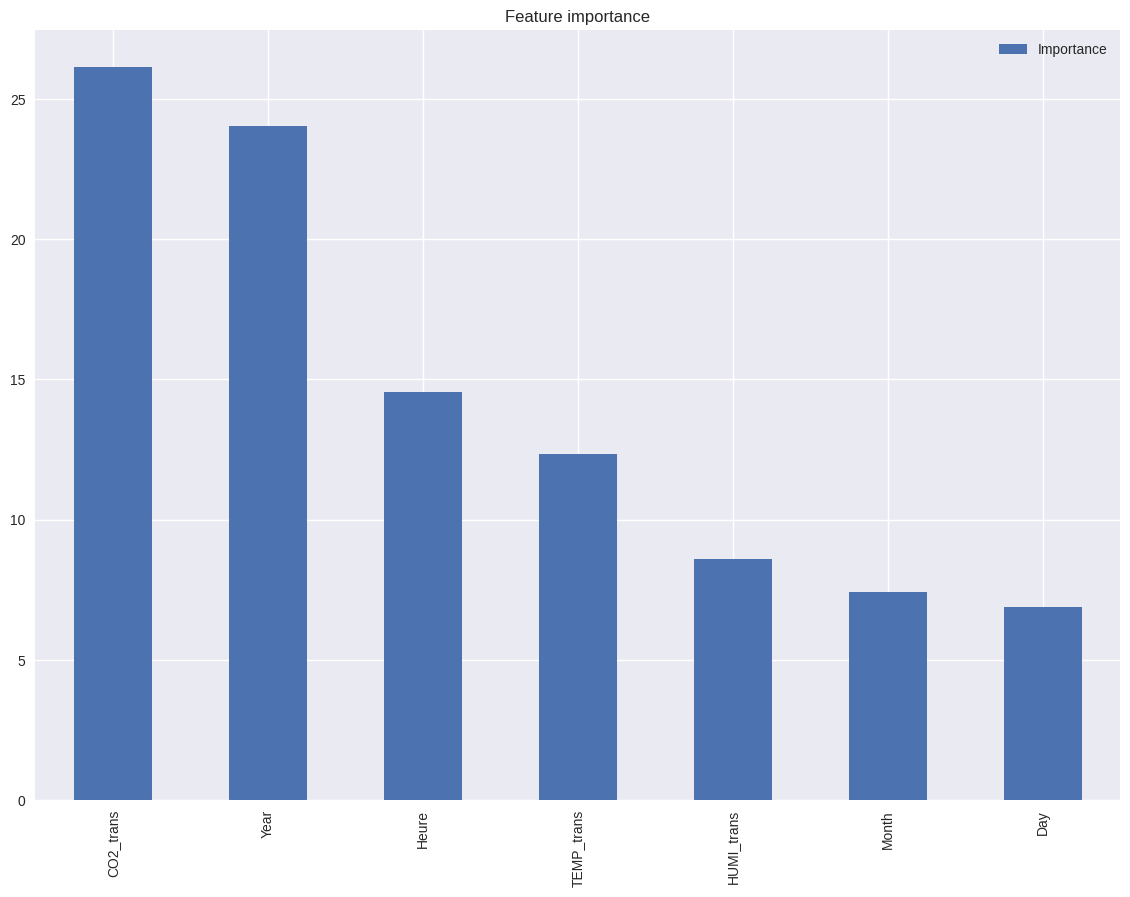

In [49]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=1000,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(chatelet_air,"PM10_trans",restricted_trans_cols,model,lmbda=chatelet_lmbda["PM10"])

Mean absolute error: 10.30
Mean absolute error percentage: 42.80%


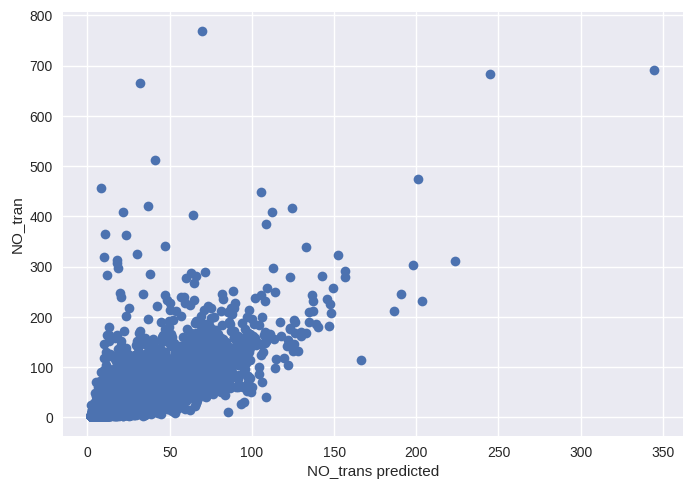

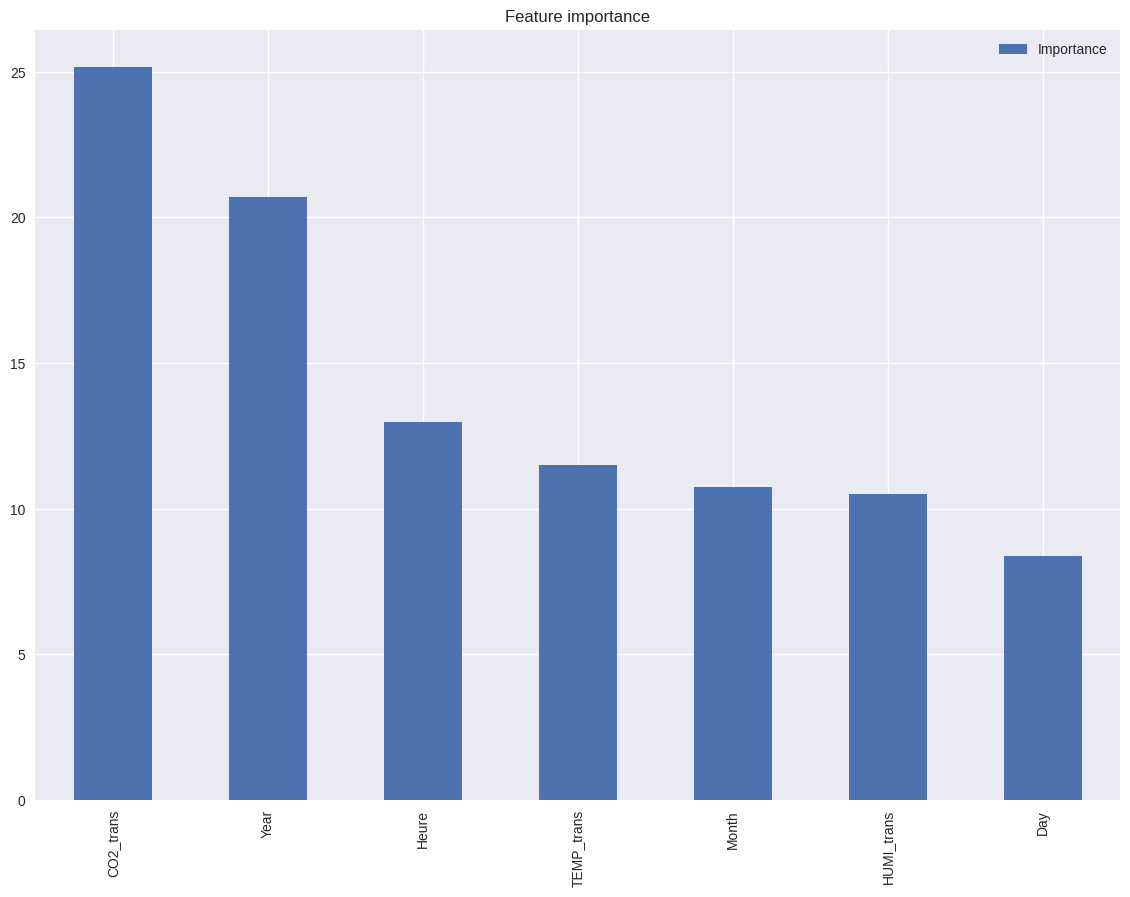

In [50]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=1000,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(chatelet_air,"NO_trans",restricted_trans_cols,model,lmbda=chatelet_lmbda["NO"])

Mean absolute error: 5.46
Mean absolute error percentage: 18.03%


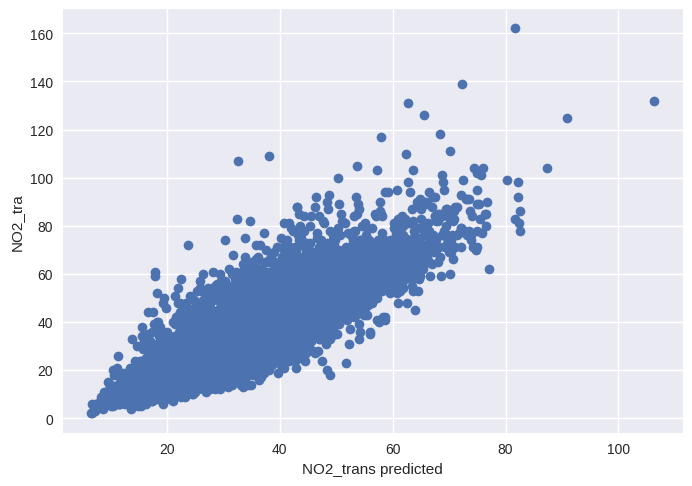

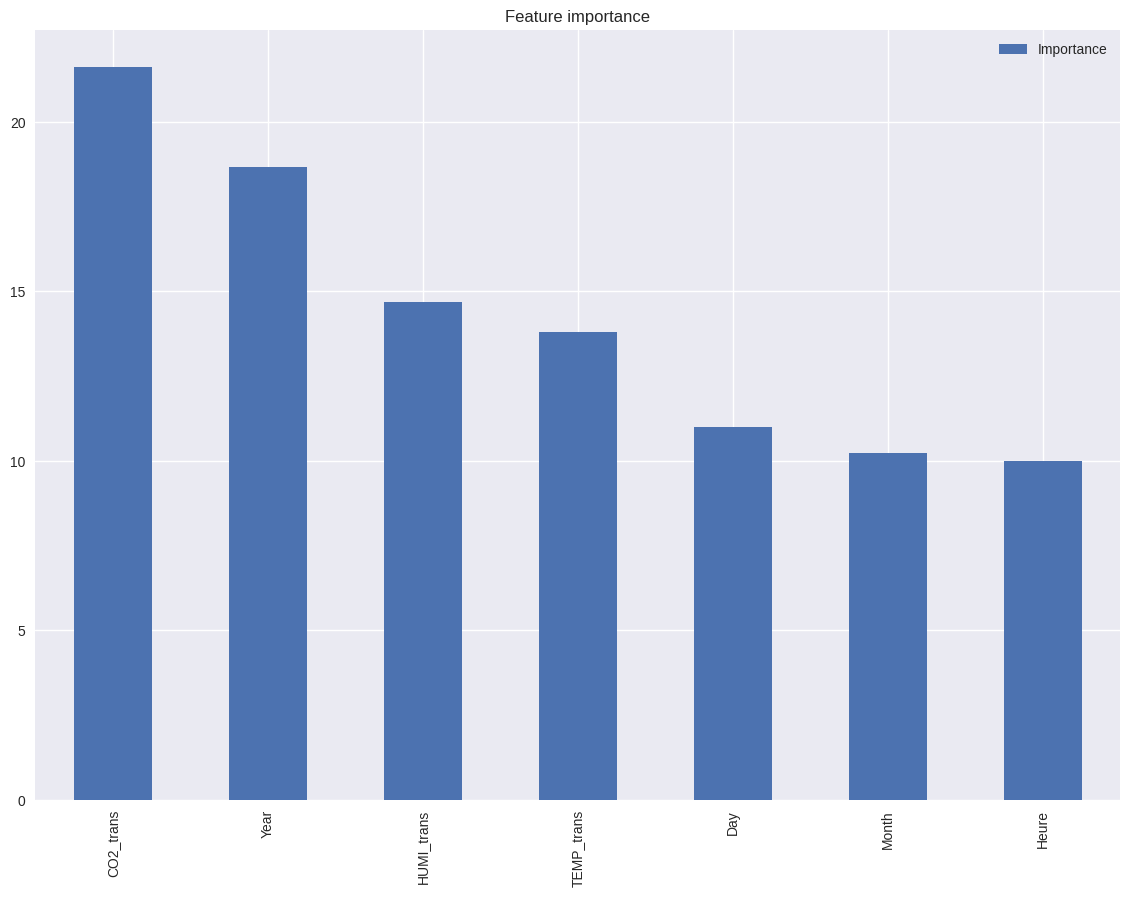

In [51]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=1000,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(chatelet_air,"NO2_trans",restricted_trans_cols,model,lmbda=chatelet_lmbda["NO2"])

Mean absolute error: 16.73
Mean absolute error percentage: 30.67%


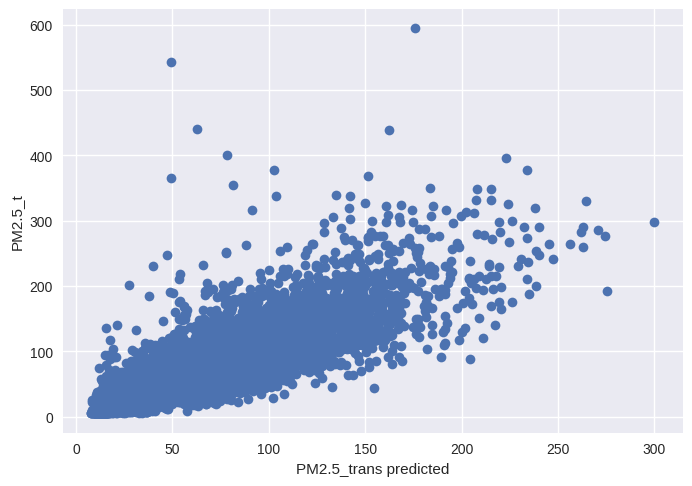

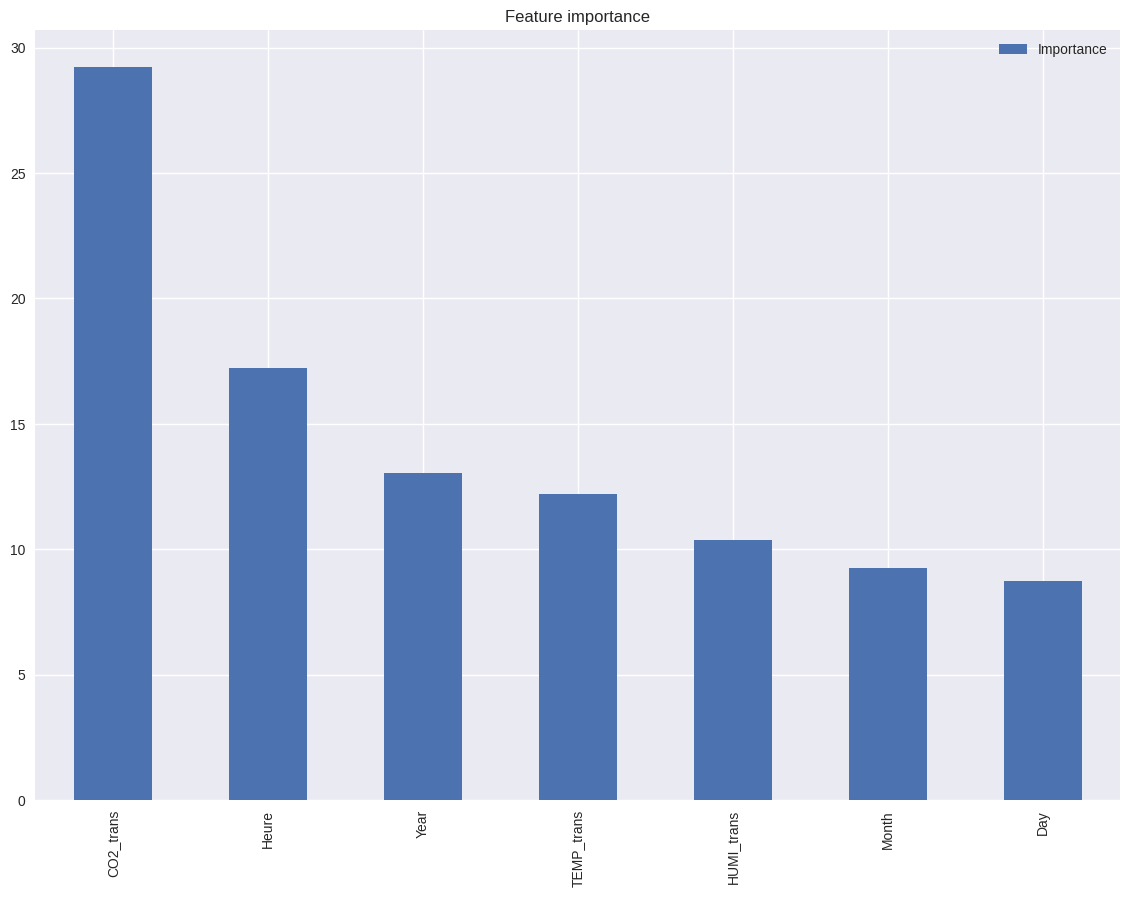

In [52]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=1000,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(auber_air,"PM2.5_trans",restricted_trans_cols,model,lmbda=auber_lmbda["PM2.5"])

Finally as we can see in feature importance plot, the current CO2 level is really significant in prediction of others targets. Because it has a lot weights than other predictors.

# Comparaison of models on each stations

In [53]:
stations_df={"chatelet":chatelet_air,"rooselvelt":roosevelt_air,"auber":auber_air}

def comparaisons(stations_df,model,predictor_cols,targets,cv=30):
    
    col=["Name","mse_mean","r2_mean","mse_std","r2_std","targets"]

    df=pd.DataFrame(columns=col)

    for target in targets:
        
        for station in stations_df.keys():
        
            data=stations_df[station]

            train_set=data[predictor_cols]

            train_label=data[target]

            Name=station

            mse_list=cross_val_score(model,train_set,train_label,scoring="neg_mean_squared_error",cv=cv)
            mse=-np.mean(mse_list)

            r2_list=cross_val_score(model,train_set,train_label,scoring="r2",cv=cv)
            r2=np.mean(r2_list)

            mse_std=-np.std(mse_list)
            r2_std=np.std(r2_list)

            df1=pd.DataFrame([[Name,mse,r2,mse_std,r2_std,target]],columns=col)
            df=df.append(df1)

    return df

In [54]:
compa_stations_df=comparaisons(stations_df,model,restricted_trans_cols,["CO2_trans","NO_trans","NO2_trans","PM10_trans"],cv=30)
compa_stations_df.to_csv("compa_stations_df.csv",index=False)

In [ ]:
compa_stations_df.to_csv("compa_stations_df.csv",index=False)

# Can current levels in two stations help predict levels in third station?

In [ ]:
transform_data(mergedData,to_transform_cols=["CO2_roos","C02_aub","CO2_chat"])

In [ ]:
model=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=1000,
                          random_state=5,
                          n_jobs=-1
                          )

make_regression(auber_air,"CO2_chat_trans",["CO2_roos_trans","C02_aub_trans"],model,lmbda=-1)